In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy
import time
import seaborn as sns
import MLP_for_tests as mlp

In [ ]:
# --------------------------------Load the datasets-------------------------------------#

# Classification problems

### Simple 100

In [108]:
#training set
test = np.loadtxt("Project 1 datasets/classification/data.simple.train.100.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_100=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_100=Y

In [109]:
#testing set
test = np.loadtxt("Project 1 datasets/classification/data.simple.test.100.csv", delimiter=',', skiprows=1, usecols=range(0,3))
X1=test[:,0:2]
Y1=test[:,2:3]
Y1=Y1==np.unique(Y1)
Y1=np.array(Y1,dtype=int)
test_input_layer_100=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_100=Y1

### Simple 500

In [212]:
#training set
test = np.loadtxt("Project 1 datasets/classification/data.simple.train.500.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_500=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_500=Y

In [213]:
#testing set
test = np.loadtxt("Project 1 datasets/classification/data.simple.test.500.csv", delimiter=',', skiprows=1, usecols=range(0,3))
X1=test[:,0:2]
Y1=test[:,2:3]
Y1=Y1==np.unique(Y1)
Y1=np.array(Y1,dtype=int)
test_input_layer_500=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_500=Y1

### Simple 1000

In [110]:
#training set
test = np.loadtxt("Project 1 datasets/classification/data.simple.train.1000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_1000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_1000=Y

In [111]:
#testing set
test = np.loadtxt("Project 1 datasets/classification/data.simple.test.1000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
X1=test[:,0:2]
Y1=test[:,2:3]
Y1=Y1==np.unique(Y1)
Y1=np.array(Y1,dtype=int)
test_input_layer_1000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_1000=Y1

### Simple 10000

In [198]:
#training set
test = np.loadtxt("Project 1 datasets/classification/data.simple.train.10000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_10000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_10000=Y

In [199]:
#testing set
test = np.loadtxt("Project 1 datasets/classification/data.simple.test.10000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
X1=test[:,0:2]
Y1=test[:,2:3]
Y1=Y1==np.unique(Y1)
Y1=np.array(Y1,dtype=int)
test_input_layer_10000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_10000=Y1

In [103]:
# Create an empty data frame for the results

df=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

MAX_EPOCH=400

ITER=30

networks=[]

networks_names=[]

networks_err=[]

model_n=0

In [104]:
# Create function for testing

def Generate_network_scores(df,train_input_layer,train_output_layer,test_input_layer,test_output_layer,dataset,input_layer_len, output_layer_len, L,
                 acti_funs,acti_funs_str,acti_funs_grad,cost_fun,cost_fun_str,cost_fun_grad,networks,networks_err,problem="",seed=123):
    
    global MAX_EPOCH
    mlp_test=mlp.MLP_new(input_layer_len,output_layer_len,L,[acti_funs]*len(L),[acti_funs_grad]*len(L),cost_fun,cost_fun_grad,problem=problem,seed=seed)
        
    start_time = time.time()
    er=mlp_test.train(train_input_layer,train_output_layer,max_epoch=MAX_EPOCH,Verbose=False)
    end_time = time.time()
    t=end_time - start_time
        
    networks.append(deepcopy(mlp_test))
    networks_err.append(er.copy())
    networks_names.append(dataset+str(L))
    
    output_layer=mlp_test.calculate(train_input_layer)
    score_train=cost_fun(train_output_layer,output_layer)/output_layer.shape[0]
    if problem=="classification":
        accuracy_train=round(np.mean(np.argmax(train_output_layer,axis=1)==np.argmax(output_layer,axis=1)),3)
    else:
        accuracy_train=0
    output_layer=mlp_test.calculate(test_input_layer)
    score_test=cost_fun(test_output_layer,output_layer)/output_layer.shape[0]
    if problem=="classification":
        accuracy_test=round(np.mean(np.argmax(test_output_layer,axis=1)==np.argmax(output_layer,axis=1)),3)
    else:
        accuracy_test=0
    
    #L1=sum([np.sum(w**2) for w in mlp_test.weights])
    #L2=sum([np.sum(np.abs(w)) for w in mlp_test.weights])
    
    rows_train=train_input_layer.shape[0]
    rows_test=test_input_layer.shape[0]
    columns_input=train_input_layer.shape[1]
    columns_output=train_output_layer.shape[1]
    connections=sum([L[i]*L[i+1] for i in range(len(L)-1)])+columns_input*L[0]+columns_output*L[-1]
    neurons=sum(L)
    L1=L1/connections
    L2=L2/connections
    global model_n
    model_n+=1
    t=t/(len(er)-1)
    df=df.append({"model_n":model_n,"problem":problem,"dataset":dataset,"columns_input":columns_input,"columns_output":columns_output,
                  "rows_train":rows_train,"rows_test":rows_test,"layers":len(L),"neurons":neurons,"connections":connections,
                  "L1":L1,"L2":L2,"regularization":"None","alpha":0,"activation_function":acti_funs_str,
                         "validate":0,"accuracy_train":accuracy_train,"accuracy_test":accuracy_test,"score_train":score_train,"score_test":score_test,"cost_function":cost_fun_str,
                         "epochs":len(er)-1,"time":t,"rate":0.1,"beta":0,"RMSprop":False,"batch":1, "seed":seed},ignore_index=True)
    return df

In [105]:
#1. -----------------How does activation function affect the model’s accuracy?------------------------------

### Simple 100

In [112]:
for se in range(ITER):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df=Generate_network_scores(df,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)






start error 51.27856656526953
end in epoch 400 with error 20.348977651059954
start error 57.57422629185461
end in epoch 400 with error 7.9357612399474355
start error 55.855781141040175
end in epoch 400 with error 6.787774413612796
start error 70.62526854286578
end in epoch 400 with error 13.194032068649989
start error 80.56663408201811
end in epoch 400 with error 4.592148355255404
start error 76.67782652693282
end in epoch 400 with error 4.746825198256079
start error 63.834913641666944
end in epoch 400 with error 44.730658838165894
start error 45.50061356442755
end in epoch 400 with error 9.270291787034598
start error 59.45603485167933
end in epoch 400 with error 4.693374989334018
start error 86.63352676273209
end in epoch 400 with error 21.86139975322399
start error 64.74869768219767
end in epoch 400 with error 4.015564944645311
start error 80.60170482842477
end in epoch 400 with error 2.0708935761497465
start error 57.76289385200916
end in epoch 400 with error 18.588214640641702
star

end in epoch 400 with error 0.8319227700116376
start error 59.71507483481865
end in epoch 400 with error 20.60382100089198
start error 71.00161436013269
end in epoch 400 with error 6.4967408402408715
start error 87.80692099473288
end in epoch 400 with error 6.459784996254759
start error 79.26468386394198
end in epoch 400 with error 13.078207421079458
start error 92.23972611013149
end in epoch 400 with error 4.465259589740866
start error 111.2309577023589
end in epoch 400 with error 4.682162887442858
start error 50.76599239663509
end in epoch 400 with error 45.16578094917105
start error 58.91385913377296
end in epoch 400 with error 5.67202643040412
start error 49.996553937224974
end in epoch 400 with error 4.528480437521107
start error 70.08244581724793
end in epoch 400 with error 23.81573473567383
start error 78.92695431608104
end in epoch 400 with error 2.357612483645049
start error 69.31247944897467
end in epoch 400 with error 2.20709832913819
start error 82.92920031554956
end in epo

end in epoch 400 with error 0.6904903274609697
start error 66.87923798554132
end in epoch 400 with error 42.4109026299743
start error 65.81785404429101
end in epoch 400 with error 13.351140051193841
start error 69.17815613938524
end in epoch 400 with error 9.086552083692691
start error 89.14020019597868
end in epoch 400 with error 20.959845242411138
start error 88.34815235131649
end in epoch 400 with error 6.207593015734025
start error 90.18757254289946
end in epoch 400 with error 5.105262937392963
start error 53.04789233563813
end in epoch 400 with error 44.099685161451774
start error 43.1333528447752
end in epoch 400 with error 7.436880188997039
start error 48.98662797912288
end in epoch 400 with error 5.805574274101744
start error 72.42679412872387
end in epoch 400 with error 23.395611881475325
start error 62.00001803866186
end in epoch 400 with error 1.8798867115668094
start error 69.21620162493184
end in epoch 400 with error 2.1116723745960853
start error 62.87440958182147
end in 

end in epoch 400 with error 0.7792002289606667
start error 51.79391092614112
end in epoch 400 with error 26.596208006956253
start error 43.54486777373285
end in epoch 400 with error 10.516206267528784
start error 33.74369755523483
end in epoch 400 with error 6.843389675615811
start error 70.93023184321976
end in epoch 400 with error 17.253556099216745
start error 62.53463314377926
end in epoch 400 with error 6.751073104448127
start error 52.481204618466606
end in epoch 400 with error 4.652055237922296
start error 55.28590411703662
end in epoch 400 with error 47.89223087169423
start error 78.01150162702858
end in epoch 400 with error 7.917657210571204
start error 81.59645778667043
end in epoch 400 with error 4.24358842838443
start error 75.04097001476151
end in epoch 400 with error 44.46409329680054
start error 104.62364880586559
end in epoch 400 with error 3.7559658539182967
start error 102.43545806728889
end in epoch 400 with error 2.0517441266401693
start error 55.77066915713988
end 

end in epoch 400 with error 0.675112919789302
start error 51.71983126944558
end in epoch 400 with error 33.87536357269828
start error 54.87940197381059
end in epoch 400 with error 14.561609872141366
start error 57.32298637891755
end in epoch 400 with error 11.000650875519195
start error 71.05799168591258
end in epoch 400 with error 16.593877378154303
start error 74.54622344289675
end in epoch 400 with error 5.027313526032311
start error 76.88646494387808
end in epoch 400 with error 5.284845655136269
start error 49.80048582890044
end in epoch 400 with error 46.91030636659249
start error 52.009347955234134
end in epoch 400 with error 9.06244933230272
start error 44.790458209511996
end in epoch 400 with error 5.685111057744123
start error 69.11509935868193
end in epoch 400 with error 36.68697500314504
start error 71.33715882692273
end in epoch 400 with error 2.019492651384888
start error 64.0266117946451
end in epoch 400 with error 2.082638068108152
start error 85.36421300224492
end in ep

end in epoch 400 with error 0.9325635776973659
start error 88.85725004552695
end in epoch 400 with error 28.950143654900437
start error 93.11780405635179
end in epoch 400 with error 9.294510128137212
start error 131.26561416964404
end in epoch 400 with error 7.100182647387352
start error 167.75384652764342
end in epoch 400 with error 13.465815630810573
start error 163.46373835375715
end in epoch 400 with error 4.625098200996077
start error 192.16948377791434
end in epoch 400 with error 4.555172535623816
start error 66.97265499530522
end in epoch 400 with error 48.11521987738806
start error 72.85906578175096
end in epoch 400 with error 10.997299639204599
start error 63.996449178360706
end in epoch 400 with error 4.352054163382949
start error 91.66739827689364
end in epoch 400 with error 44.439361542289106
start error 98.66600157879827
end in epoch 400 with error 3.806300063501659
start error 83.81927479525123
end in epoch 400 with error 2.17433412865453
start error 50.6714457982292
end 

end in epoch 400 with error 0.6889149859448981
start error 46.038515605903775
end in epoch 400 with error 18.90049921467164
start error 43.3753994257751
end in epoch 400 with error 6.485309498064595
start error 31.771882628832504
end in epoch 400 with error 6.534134420099706
start error 65.18119991704509
end in epoch 400 with error 13.049123945371077
start error 61.60468694877189
end in epoch 400 with error 4.276757077494515
start error 50.46611224287312
end in epoch 400 with error 4.673889597649895
start error 64.6459120605457
end in epoch 400 with error 45.38354757924206
start error 53.28061025311632
end in epoch 400 with error 8.518476703473699
start error 53.120589073269414
end in epoch 400 with error 4.3696958998776365
start error 87.8563175761146
end in epoch 400 with error 24.521254212909277
start error 73.15279735920421
end in epoch 400 with error 2.1014987501097573
start error 72.4417150589351
end in epoch 400 with error 2.1399618220534604
start error 42.689947965884315
end in

end in epoch 400 with error 0.6804621289846406
start error 68.41994044120543
end in epoch 400 with error 18.185928202304712
start error 35.477735735945544
end in epoch 400 with error 7.187432106210926
start error 12.984692065747717
end in epoch 400 with error 5.385730078668514
start error 91.25085962207456
end in epoch 400 with error 13.381752621745388
start error 49.70193600103873
end in epoch 400 with error 4.8682248552496095
start error 23.6814978611122
end in epoch 400 with error 4.471977270957946
start error 51.75885032359068
end in epoch 400 with error 44.84769902585086
start error 87.063243907996
end in epoch 400 with error 6.033598108514605
start error 75.6552554722216
end in epoch 400 with error 4.152579622339073
start error 71.07606633508429
end in epoch 400 with error 28.404874426260506
start error 121.5575484486223
end in epoch 400 with error 1.9228331626143438
start error 98.38634507365535
end in epoch 400 with error 2.066015131978271
start error 53.715848677198125
end in 

end in epoch 400 with error 0.8052805700990993
start error 42.91216280558631
end in epoch 400 with error 20.989745854147003
start error 35.23953593363791
end in epoch 400 with error 7.5907952627559485
start error 29.724904498239106
end in epoch 400 with error 7.442153428471935
start error 62.178969413003514
end in epoch 400 with error 13.409021751312558
start error 54.164135192582734
end in epoch 400 with error 4.506179699098575
start error 48.17857163761776
end in epoch 400 with error 4.81561613381119
start error 69.65472619447337
end in epoch 400 with error 40.26712089687031
start error 55.208162258653346
end in epoch 400 with error 5.668545624487855
start error 31.658502796089426
end in epoch 400 with error 4.29425401706807
start error 96.55775477469334
end in epoch 400 with error 21.259925471978047
start error 75.08722228384502
end in epoch 400 with error 1.9055941750667496
start error 49.80036443375834
end in epoch 400 with error 1.9792976291430593
start error 53.594088127732846
e

end in epoch 400 with error 0.9495787798446909
start error 62.665159711856035
end in epoch 400 with error 24.579291312997178
start error 38.517409855416965
end in epoch 400 with error 11.254806481593945
start error 21.708897544998667
end in epoch 400 with error 7.314698890652624
start error 84.41355364145069
end in epoch 400 with error 16.36510399529491
start error 56.08580076032486
end in epoch 400 with error 6.594468507895259
start error 37.71567629000104
end in epoch 400 with error 4.7123091384017055
start error 77.66420332488492
end in epoch 400 with error 51.218960444415885
start error 104.95437581868886
end in epoch 400 with error 16.335927932051614
start error 128.14192281420426
end in epoch 400 with error 6.313749439192948
start error 106.04452392189901
end in epoch 400 with error 61.67986393139411
start error 179.91828100957144
end in epoch 400 with error 2.3905507101730477
start error 182.5661170406063
end in epoch 400 with error 2.13142057217752
start error 88.34247441172576

end in epoch 400 with error 0.7116812034917517


In [113]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
df[['layers', 'neurons', 'connections', 'activation_function','accuracy_train', 'accuracy_test', 'score_train', 'score_test',
       'cost_function', 'epochs', 'time', 'seed']]

,layers,neurons,connections,activation_function,accuracy_train,accuracy_test,score_train,score_test,cost_function,epochs,time,seed
0,1,5,20,sigmoid,0.95,0.99,0.203490,0.212760,MSE,400,0.005815,0
1,1,5,20,ReLU,1.00,1.00,0.079358,0.083241,MSE,400,0.005409,0
2,1,5,20,tanh,1.00,1.00,0.067878,0.071045,MSE,400,0.006119,0
3,1,5,20,sigmoid,0.99,1.00,0.131940,0.138341,cross entropy,400,0.006677,0
4,1,5,20,ReLU,1.00,0.99,0.045921,0.053307,cross entropy,400,0.009587,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,4,12,39,ReLU,0.92,0.89,0.180015,0.209239,MSE,400,0.010636,29
1076,4,12,39,tanh,1.00,0.99,0.041787,0.045788,MSE,400,0.014471,29
1077,4,12,39,sigmoid,0.53,0.53,0.691469,0.691404,cross entropy,43,0.014782,29
1078,4,12,39,ReLU,1.00,0.99,0.025224,0.040834,cross entropy,400,0.011317,29


In [114]:
df[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.971000,0.963528
sigmoid,0.762111,0.767056
tanh,0.999194,0.992083


In [115]:
df[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.009152,0.008994
sigmoid,0.044759,0.046478
tanh,0.000084,0.000124


In [117]:
df[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.889704,0.887574
cross entropy,0.931833,0.927537


In [118]:
df[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.032582,0.032215
cross entropy,0.024898,0.024063


In [120]:
best=df.nsmallest(1, 'score_test')["model_n"].values[0]

In [150]:
df.loc[676,].drop(["L1", "L2"])

model_n                           677
problem                classification
dataset                     simple100
columns_input                       2
columns_output                      2
rows_train                        100
rows_test                         100
layers                              3
neurons                            18
connections                        96
regularization                   None
alpha                               0
activation_function              ReLU
validate                            0
accuracy_train                      1
accuracy_test                       1
score_train                0.00555251
score_test                  0.0120772
cost_function           cross entropy
epochs                            400
time                       0.00965294
rate                              0.1
beta                                0
RMSprop                         False
batch                               1
seed                               18
Name: 676, d

[Text(0.5, 1.0, 'Test data')]

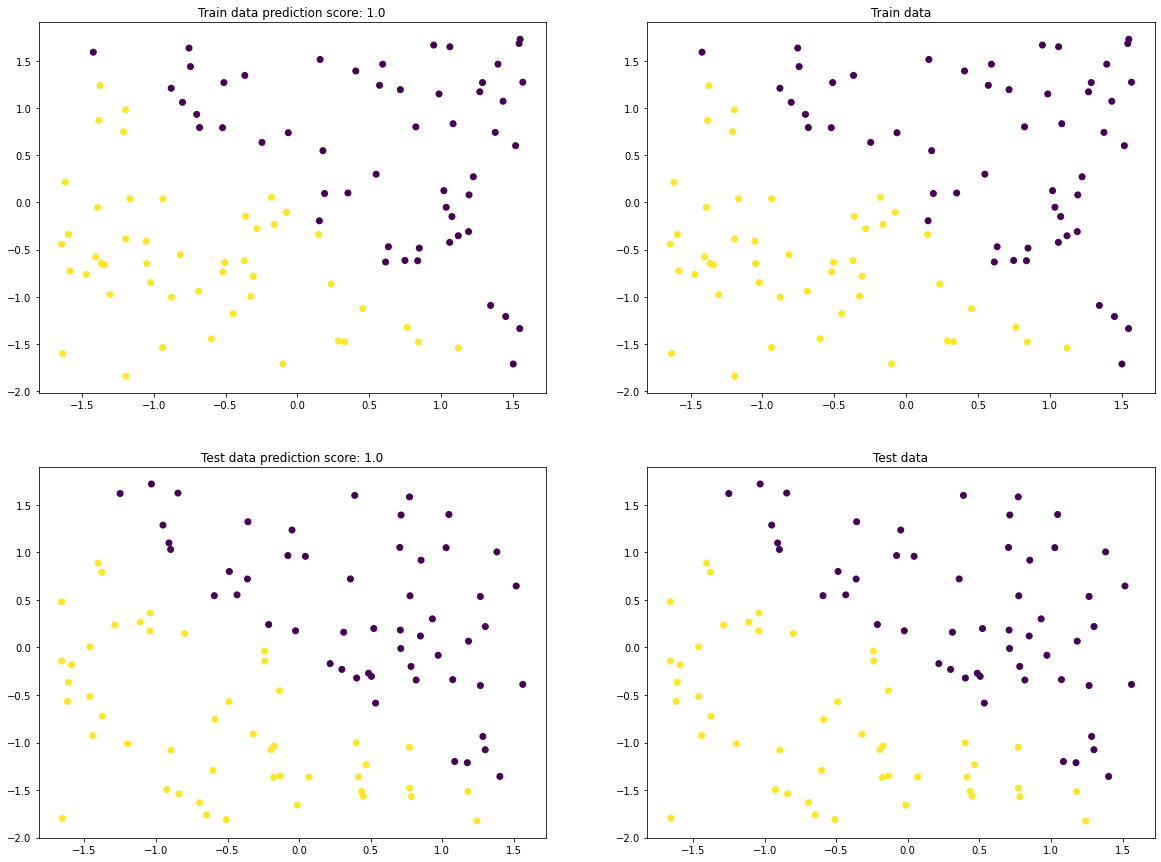

In [137]:
mlp_test_100=networks[best-1]

output_layer_100=mlp_test_100.calculate(train_input_layer_100)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_100[:,0],train_input_layer_100[:,1],c=np.argmax(output_layer_100,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_100,axis=1)==np.argmax(output_layer_100,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_100[:,0],train_input_layer_100[:,1],c=np.argmax(train_output_layer_100,axis=1))
ax1.set(title="Train data")


output_layer_100=mlp_test.calculate(test_input_layer_100)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_100[:,0],test_input_layer_100[:,1],c=np.argmax(output_layer_100,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_100,axis=1)==np.argmax(output_layer_100,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_100[:,0],test_input_layer_100[:,1],c=np.argmax(test_output_layer_100,axis=1))
ax3.set(title="Test data")

In [147]:
output_layer_100[0:9] # predictions for the test set

array([[9.99987413e-01, 1.25865478e-05],
       [1.04679278e-03, 9.98953207e-01],
       [9.99912553e-01, 8.74469649e-05],
       [9.99854004e-01, 1.45996273e-04],
       [9.99999938e-01, 6.16203606e-08],
       [9.95285641e-01, 4.71435899e-03],
       [1.84976174e-08, 9.99999982e-01],
       [9.99999994e-01, 5.71412062e-09],
       [9.99999996e-01, 3.84118027e-09]])

In [151]:
df_best_model=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

MAX_EPOCH=400

ITER=30

networks_best=[]

networks_names_best=[]

networks_err_best=[]

model_n=0
df_best_model = Generate_network_scores(df_best_model,train_input_layer_100,train_output_layer_100,test_input_layer_100,test_output_layer_100,"simple100",2,2,[6,6,6],mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks_best,networks_err_best,problem="classification",seed=18)



start error 70.55706863329527
end in epoch 400 with error 0.5552506220779838


In [152]:
df_best_model

,model_n,problem,dataset,columns_input,columns_output,rows_train,rows_test,layers,neurons,connections,L1,L2,regularization,alpha,activation_function,validate,accuracy_train,accuracy_test,score_train,score_test,cost_function,epochs,time,rate,beta,RMSprop,batch,seed
0,1,classification,simple100,2,2,100,100,3,18,96,0.477462,0.601283,None,0,ReLU,0,1.0,1.0,0.005553,0.012077,cross entropy,400,0.009565,0.1,0,False,1,18


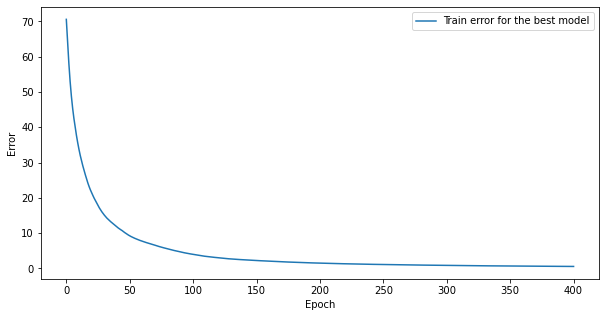

In [197]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(networks_err_best).T, label='Train error for the best model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc="upper right") 

### Simple 500

In [204]:
df500=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

MAX_EPOCH=400

ITER=30

networks=[]

networks_names=[]

networks_err=[]

model_n=0

In [214]:
for se in range(10):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df500=Generate_network_scores(df500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)



start error 257.31947749593917
end in epoch 400 with error 108.18081056957031
start error 269.57673502305283
end in epoch 400 with error 44.482918684817996
start error 267.74772864787633
end in epoch 400 with error 37.05215655978537
start error 354.46218948918386
end in epoch 400 with error 69.9157728262369
start error 382.70791551111006
end in epoch 400 with error 30.106200957619148
start error 369.4526333130694
end in epoch 400 with error 28.824017540816982
start error 342.95491606872577
end in epoch 400 with error 228.7059291094551
start error 248.66175507442784
end in epoch 400 with error 48.29858348187221
start error 288.07822731983845
end in epoch 400 with error 26.945936543747248
start error 460.2901026082677
end in epoch 400 with error 122.86883557387264
start error 347.2700891074245


/Users/urszulabialonczyk/Documents/Deep Learning/Project1/MLP_for_tests.py:346: RuntimeWarning: divide by zero encountered in true_divide
  return (Y_hat-eps-Y)/Y_hat/(1-Y_hat)
/Users/urszulabialonczyk/Documents/Deep Learning/Project1/MLP_for_tests.py:132: RuntimeWarning: invalid value encountered in multiply
  errors[x][i]=self.weights[i+1].T.dot(errors[x][i+1])*self.acti_funs_grad[i](self.hidden_layers[i][:,x:x+1])


end in epoch 400 with error nan
start error 394.4555002750475
end in epoch 400 with error 15.788392737562344
start error 296.2564947879356
end in epoch 400 with error 100.62965138421364
start error 362.026384621993
end in epoch 400 with error 42.039267897346164
start error 370.7320951892873
end in epoch 400 with error 34.692691724022424
start error 394.19195584677584
end in epoch 400 with error 68.07939204020106
start error 469.53573150692216
end in epoch 400 with error 29.588284898280712
start error 480.43422592546085
end in epoch 400 with error 28.10109191342541
start error 252.00211708251302
end in epoch 400 with error 249.9097806713505
start error 268.03885272020455
end in epoch 400 with error 71.09853039405843
start error 322.31461775257793
end in epoch 400 with error 20.636210251180703
start error 348.57841975258407
end in epoch 400 with error 343.3227943556144
start error 364.74203905940556
end in epoch 400 with error 21.421587148865527
start error 422.065220687453
end in epoch 

end in epoch 400 with error 129.77237195884985
start error 391.38411860984974
end in epoch 400 with error 16.05920637707898
start error 348.92822096353507
end in epoch 400 with error 15.597745991425203
start error 387.5158442541308
end in epoch 400 with error 90.43128272483642
start error 512.323773987287
end in epoch 400 with error 45.60146840737605
start error 616.4724420163031
end in epoch 400 with error 30.397653032486673
start error 521.0514638353483
end in epoch 400 with error 64.3825886400106
start error 720.0632449530887
end in epoch 400 with error 28.850277521492874
start error 933.445611378893
end in epoch 400 with error 26.629237036451855
start error 326.33853078506354
end in epoch 400 with error 246.9079759778007
start error 234.17919771255467
end in epoch 400 with error 34.17446545486007
start error 133.24788506788647
end in epoch 400 with error 17.62575874437036
start error 435.7418568255058
end in epoch 400 with error 335.5513330140691
start error 330.6670752180655
end i

end in epoch 400 with error 32.306538639498896
start error 354.3671890139762
end in epoch 400 with error 139.64999957014075
start error 320.24321995230775
end in epoch 400 with error 15.809042701344097
start error 379.8872366490471
end in epoch 400 with error 16.362736715772954
start error 294.91399929354014
end in epoch 400 with error 91.10091462627699
start error 333.112194037922
end in epoch 400 with error 34.21576207425495
start error 401.7528769568153
end in epoch 400 with error 32.961057481567344
start error 399.34705049312157
end in epoch 400 with error 65.639117860218
start error 464.6531981933045
end in epoch 400 with error 27.74001789611746
start error 574.7450850124933
end in epoch 400 with error 27.541247910466232
start error 253.18403231530309
end in epoch 400 with error 248.628061052378
start error 247.00022365247997
end in epoch 400 with error 55.93709160301147
start error 231.21018696432515
end in epoch 400 with error 28.78851576724083
start error 349.7685596197823
end 

end in epoch 400 with error 47.69432274028611
start error 407.25145801530573
end in epoch 400 with error 24.749071757781785
start error 388.23803983929076
end in epoch 400 with error 231.12277880498806
start error 521.4568466592335
end in epoch 400 with error 24.346825288154157
start error 511.305758680391
end in epoch 400 with error 14.868132274874645
start error 286.98610961667424
end in epoch 400 with error 88.45414161503604
start error 302.1455986535508
end in epoch 400 with error 36.27770540691679
start error 334.59556547178096
end in epoch 400 with error 32.61613594935239
start error 385.3152497802215
end in epoch 400 with error 64.14511359886377
start error 402.97220525897245
end in epoch 400 with error 27.594728259592838
start error 433.32889755265415
end in epoch 400 with error 27.043206178192357
start error 367.39245641932496
end in epoch 400 with error 250.1816946204994
start error 436.9313588548691
end in epoch 400 with error 119.65712326898144
start error 290.9153236075903

KeyboardInterrupt: 

In [230]:
df500=df500[df500['seed']<10]

In [231]:
df500[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.954678,0.947702
sigmoid,0.760250,0.761917
tanh,0.999833,0.992167


In [232]:
df500[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.016644,0.016176
sigmoid,0.045211,0.046513
tanh,0.000002,0.000017


In [234]:
df500[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.886722,0.883333
cross entropy,0.923293,0.918022


In [243]:
df500[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.034303,0.033887
cross entropy,0.027827,0.027147


In [236]:
best500=df500.nsmallest(1, 'score_test')["model_n"].values[0]
best500

174

In [247]:
df500.loc[173,].drop(["L1", "L2"])

model_n                           174
problem                classification
columns_input                       2
columns_output                      2
rows_train                        100
rows_test                         100
layers                              3
neurons                            18
connections                        96
regularization                   None
alpha                               0
activation_function              tanh
validate                            0
accuracy_train                      1
accuracy_test                    0.99
score_train                 0.0073614
score_test                   0.015484
cost_function           cross entropy
epochs                            400
time                        0.0131055
rate                              0.1
beta                                0
RMSprop                         False
batch                               1
seed                                4
Name: 173, dtype: object

[Text(0.5, 1.0, 'Test data')]

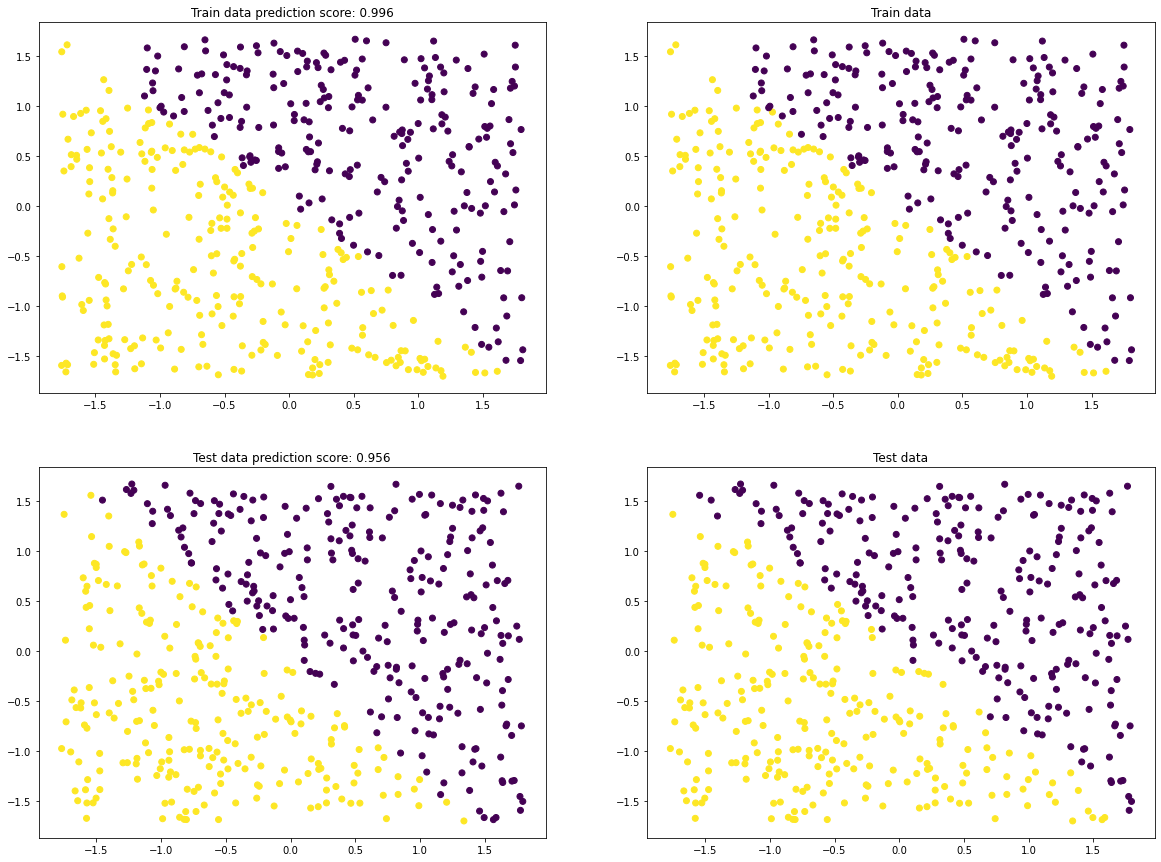

In [240]:
mlp_test_500=networks[best500-1]

output_layer_500=mlp_test_500.calculate(train_input_layer_500)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_500[:,0],train_input_layer_500[:,1],c=np.argmax(output_layer_500,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_500,axis=1)==np.argmax(output_layer_500,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_500[:,0],train_input_layer_500[:,1],c=np.argmax(train_output_layer_500,axis=1))
ax1.set(title="Train data")


output_layer_500=mlp_test.calculate(test_input_layer_500)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_500[:,0],test_input_layer_500[:,1],c=np.argmax(output_layer_500,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_500,axis=1)==np.argmax(output_layer_500,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_500[:,0],test_input_layer_500[:,1],c=np.argmax(test_output_layer_500,axis=1))
ax3.set(title="Test data")

In [241]:
df_best_model_500=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

MAX_EPOCH=400

ITER=30

networks_best500=[]

networks_names_best500=[]

networks_err_best500=[]

model_n=0
df_best_model500 = Generate_network_scores(df_best_model_500,train_input_layer_500,train_output_layer_500,test_input_layer_500,test_output_layer_500,"simple500",2,2,[6,6,6],mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks_best500,networks_err_best500,problem="classification",seed=4)
df_best_model500

start error 394.03923849301964
end in epoch 400 with error 8.247033804798129


,model_n,problem,dataset,columns_input,columns_output,rows_train,rows_test,layers,neurons,connections,L1,L2,regularization,alpha,activation_function,validate,accuracy_train,accuracy_test,score_train,score_test,cost_function,epochs,time,rate,beta,RMSprop,batch,seed
0,1,classification,simple500,2,2,500,500,3,18,96,0.433714,0.577044,None,0,tanh,0,0.996,0.992,0.016494,0.018241,cross entropy,400,0.063303,0.1,0,False,1,4


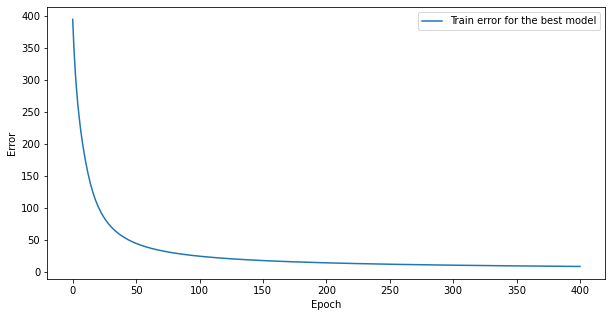

In [242]:
plt.figure(figsize=(10,5))
plt.plot(pd.DataFrame(networks_err_best500).T, label='Train error for the best model')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(loc="upper right") 

In [383]:
df500[['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE                     0.984   
                                   cross entropy           1.000   
               sigmoid             MSE                     0.938   
                                   cross entropy           0.997   
               tanh                MSE                     0.998   
                                   cross entropy           1.000   
       10      ReLU                MSE                     0.985   
                                   cross entropy           1.000   
               sigmoid             MSE                     0.970   
                                   cross entropy           0.998   
               tanh                MSE                     1.000   
                                   cross entropy           1.000   
2      10      ReLU                MSE                     0.988   
                                   cross entropy           1.000   
               sigmoid             MSE                     0.778   
                                   cross entropy           0.981   
               tanh                MSE                     1.000   
                                   cross entropy           1.000   
3      10      ReLU                MSE                     0.976   
                                   cross entropy           1.000   
               sigmoid             MSE                     0.530   
                                   cross entropy           0.577   
               tanh                MSE                     1.000   
                                   cross entropy           1.000   
       18      ReLU                MSE                     0.995   
                                   cross entropy           1.000   
               sigmoid             MSE                     0.530   
                                   cross entropy           0.764   
               tanh                MSE                     1.000   
                                   cross entropy           1.000   
4      12      ReLU                MSE                     0.759   
                                   cross entropy           0.786   
               sigmoid             MSE                     0.530   
                                   cross entropy           0.530   
               tanh                MSE                     1.000   
                                   cross entropy           1.000   

                                                  accuracy_test  score_train  \
layers neurons activation_function cost_function                               
1      5       ReLU                MSE                    0.988     0.093361   
                                   cross entropy          0.993     0.053870   
               sigmoid             MSE                    0.948     0.253271   
                                   cross entropy          0.999     0.151231   
               tanh                MSE                    0.997     0.073564   
                                   cross entropy          0.992     0.047955   
       10      ReLU                MSE                    0.984     0.073669   
                                   cross entropy          0.989     0.043764   
               sigmoid             MSE                    0.972     0.174079   
                                   cross entropy          1.000     0.123254   
               tanh                MSE                    0.994     0.062411   
                                   cross entropy          0.992     0.044654   
2      10      ReLU                MSE                    0.975     0.070288   
                                   cross entropy          0.990     0.025470   
               sigmoid             MSE                    0.775     0.442451   
                                   cross entropy          0.987     0.257461   
               tanh      

In [384]:
df500[['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE                  0.000227   
                                   cross entropy        0.000000   
               sigmoid             MSE                  0.001818   
                                   cross entropy        0.000023   
               tanh                MSE                  0.000018   
                                   cross entropy        0.000000   
       10      ReLU                MSE                  0.000294   
                                   cross entropy        0.000000   
               sigmoid             MSE                  0.000511   
                                   cross entropy        0.000018   
               tanh                MSE                  0.000000   
                                   cross entropy        0.000000   
2      10      ReLU                MSE                  0.000196   
                                   cross entropy        0.000000   
               sigmoid             MSE                  0.013351   
                                   cross entropy        0.000254   
               tanh                MSE                  0.000000   
                                   cross entropy        0.000000   
3      10      ReLU                MSE                  0.001627   
                                   cross entropy        0.000000   
               sigmoid             MSE                  0.000000   
                                   cross entropy        0.017423   
               tanh                MSE                  0.000000   
                                   cross entropy        0.000000   
       18      ReLU                MSE                  0.000161   
                                   cross entropy        0.000000   
               sigmoid             MSE                  0.000000   
                                   cross entropy        0.027871   
               tanh                MSE                  0.000000   
                                   cross entropy        0.000000   
4      12      ReLU                MSE                  0.058410   
                                   cross entropy        0.060076   
               sigmoid             MSE                  0.000000   
                                   cross entropy        0.000000   
               tanh                MSE                  0.000000   
                                   cross entropy        0.000000   

                                                  accuracy_test   score_train  \
layers neurons activation_function cost_function                                
1      5       ReLU                MSE                 0.000329  7.043132e-04   
                                   cross entropy       0.000023  1.261479e-04   
               sigmoid             MSE                 0.002484  6.170719e-03   
                                   cross entropy       0.000010  8.136944e-04   
               tanh                MSE                 0.000023  1.295009e-04   
                                   cross entropy       0.000018  4.248176e-06   
       10      ReLU                MSE                 0.000360  1.462502e-04   
                                   cross entropy       0.000032  1.800296e-05   
               sigmoid             MSE                 0.000796  3.395774e-04   
                                   cross entropy       0.000000  3.380544e-05   
               tanh                MSE                 0.000027  5.193076e-05   
                                   cross entropy       0.000018  4.670822e-06   
2      10      ReLU                MSE                 0.000472  4.309541e-04   
                                   cross entropy       0.000000  9.400175e-05   
               sigmoid             MSE                 0.016917  1.218738e-03   
                                   cross entropy       0.000157  9.314644e-03   
       

### Simple 1000

In [252]:
df1000=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

In [253]:
for se in range(10):
    for L in [[6,6,6]]:
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df1000=Generate_network_scores(df1000,train_input_layer_1000,train_output_layer_1000,test_input_layer_1000,test_output_layer_1000,"simple1000",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)



start error 500.7390684942533
end in epoch 400 with error 495.81186346247796
start error 485.9755315654466
end in epoch 400 with error 45.018569463535215
start error 633.8589264464474
end in epoch 400 with error 37.218345149979996
start error 693.8864832725304
end in epoch 400 with error 666.2875845949525
start error 679.0994689068383
end in epoch 400 with error 20.805813423767326
start error 839.0067102963997
end in epoch 400 with error 19.736315868214184
start error 700.9640317558994
end in epoch 400 with error 498.7958825155945
start error 672.3121106809942
end in epoch 400 with error 58.518029441094086
start error 532.8440227560409
end in epoch 400 with error 29.684827076144423
start error 942.2696735121189
end in epoch 400 with error 674.0859404428513
start error 953.1600980636555
end in epoch 400 with error 35.391468122689844
start error 732.7591772205435
end in epoch 400 with error 18.454029677439518
start error 528.8739586960185
end in epoch 400 with error 496.6682934470691
sta

In [254]:
df1000[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.99395,0.9923
sigmoid,0.68920,0.6737
tanh,0.99510,0.9937


In [255]:
df1000[['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.000026,0.000033
sigmoid,0.028702,0.030781
tanh,0.000010,0.000018


In [256]:
df1000[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.839733,0.831200
cross entropy,0.945767,0.941933


In [257]:
df1000[['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.048320,0.052844
cross entropy,0.007555,0.007890


In [261]:
best1000=df1000.nsmallest(1, 'score_test')["model_n"].values[0]
best1000

114

In [263]:
df1000.loc[52,].drop(["L1", "L2"])

model_n                           114
problem                classification
dataset                    simple1000
columns_input                       2
columns_output                      2
rows_train                       1000
rows_test                        1000
layers                              3
neurons                            18
connections                        96
regularization                   None
alpha                               0
activation_function              ReLU
validate                            0
accuracy_train                  0.997
accuracy_test                   0.997
score_train                 0.0181621
score_test                  0.0195988
cost_function           cross entropy
epochs                            400
time                         0.106142
rate                              0.1
beta                                0
RMSprop                         False
batch                               1
seed                                8
Name: 52, dt

[Text(0.5, 1.0, 'Test data')]

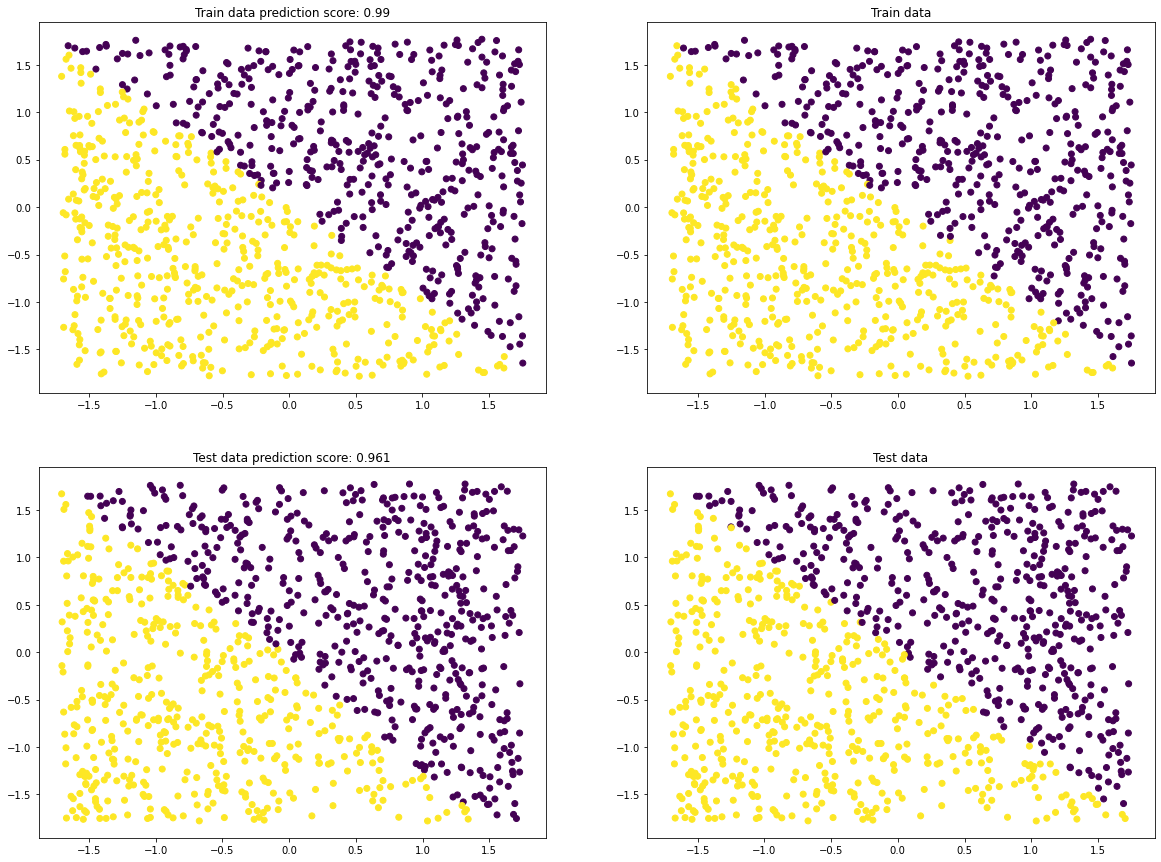

In [264]:
mlp_test_1000=networks[best1000-1]

output_layer_1000=mlp_test_1000.calculate(train_input_layer_1000)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_1000[:,0],train_input_layer_1000[:,1],c=np.argmax(output_layer_1000,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_1000,axis=1)==np.argmax(output_layer_1000,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_1000[:,0],train_input_layer_1000[:,1],c=np.argmax(train_output_layer_1000,axis=1))
ax1.set(title="Train data")


output_layer_1000=mlp_test.calculate(test_input_layer_1000)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_1000[:,0],test_input_layer_1000[:,1],c=np.argmax(output_layer_1000,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_1000,axis=1)==np.argmax(output_layer_1000,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_1000[:,0],test_input_layer_1000[:,1],c=np.argmax(test_output_layer_1000,axis=1))
ax3.set(title="Test data")

In [381]:
df1000[['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

accuracy_train  \
layers neurons activation_function cost_function                   
3      18      ReLU                MSE                    0.9911   
                                   cross entropy          0.9968   
               sigmoid             MSE                    0.5349   
                                   cross entropy          0.8435   
               tanh                MSE                    0.9932   
                                   cross entropy          0.9970   

                                                  accuracy_test  score_train  \
layers neurons activation_function cost_function                               
3      18      ReLU                MSE                   0.9896     0.051123   
                                   cross entropy         0.9950     0.023296   
               sigmoid             MSE                   0.5124     0.493769   
                                   cross entropy         0.8350     0.617028   
               tanh                MSE                   0.9916     0.035061   
                                   cross entropy         0.9958     0.019517   

                                                  score_test  
layers neurons activation_function cost_function              
3      18      ReLU                MSE              0.054100  
                                   cross entropy    0.025132  
               sigmoid             MSE              0.494810  
                                   cross entropy    0.616967  
               tanh                MSE              0.037714  
                                   cross entropy    0.020992

In [382]:
df1000[['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

accuracy_train  \
layers neurons activation_function cost_function                   
3      18      ReLU                MSE              3.587778e-05   
                                   cross entropy    1.511111e-06   
               sigmoid             MSE              7.747667e-04   
                                   cross entropy    6.910722e-03   
               tanh                MSE              1.262222e-05   
                                   cross entropy    2.222222e-07   

                                                  accuracy_test   score_train  \
layers neurons activation_function cost_function                                
3      18      ReLU                MSE                 0.000052  1.692187e-04   
                                   cross entropy       0.000002  3.390555e-05   
               sigmoid             MSE                 0.000804  5.139568e-05   
                                   cross entropy       0.006360  4.017456e-03   
               tanh                MSE                 0.000027  2.068392e-05   
                                   cross entropy       0.000002  6.274402e-07   

                                                    score_test  
layers neurons activation_function cost_function                
3      18      ReLU                MSE            1.642421e-04  
                                   cross entropy  3.569255e-05  
               sigmoid             MSE            5.281652e-05  
                                   cross entropy  4.077475e-03  
               tanh                MSE            2.592859e-05  
                                   cross entropy  7.731687e-07

### Simple 10000

In [ ]:
# puscic

In [393]:
df10000=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch", "seed"])

In [394]:
for se in range(10):
    for L in [[6,6,6]]:
        df10000=Generate_network_scores(df10000,train_input_layer_10000,train_output_layer_10000,test_input_layer_10000,test_output_layer_10000,"simple10000",2,2,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)

start error 8364.004143080267
end in epoch 400 with error 191.9013895176669
start error 7310.708056219999
end in epoch 400 with error 179.64554582567555
start error 8339.656215181647
end in epoch 400 with error 186.62459307272567
start error 5178.09392294162
end in epoch 400 with error 191.07319019722942
start error 7781.172229547701
end in epoch 400 with error 183.2324789899531
start error 7832.588073660636
end in epoch 400 with error 195.30957678579864
start error 9309.236985903972
end in epoch 400 with error 201.93136585668424
start error 9733.375626466504
end in epoch 400 with error 187.1371982482644
start error 5262.618081823035
end in epoch 400 with error 181.04540753230208
start error 12956.259806015383
end in epoch 400 with error 198.16277534394197


In [101]:
df10000[['accuracy_train', 'accuracy_test']]).mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.9738,0.9736
sigmoid,0.7327,0.7293
tanh,0.9938,0.9934


In [102]:
df10000[['accuracy_train', 'accuracy_test']]).var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.000188,0.000169
sigmoid,0.038133,0.038011
tanh,0.000005,0.000005


In [ ]:
mlp_test_10000=networks[best10000-1]

output_layer_10000=mlp_test_10000.calculate(train_input_layer_10000)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_10000[:,0],train_input_layer_10000[:,1],c=np.argmax(output_layer_10000,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_10000,axis=1)==np.argmax(output_layer_10000,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_10000[:,0],train_input_layer_10000[:,1],c=np.argmax(train_output_layer_10000,axis=1))
ax1.set(title="Train data")


output_layer_10000=mlp_test.calculate(test_input_layer_10000)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_10000[:,0],test_input_layer_10000[:,1],c=np.argmax(output_layer_10000,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_10000,axis=1)==np.argmax(output_layer_10000,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_10000[:,0],test_input_layer_10000[:,1],c=np.argmax(test_output_layer_10000,axis=1))
ax3.set(title="Test data")

In [ ]:
best10000=df10000.nsmallest(1, 'score_test')["model_n"].values[0]
best10000

In [ ]:
df10000.loc[173,].drop(["L1", "L2"])

## Three_gauss datasets

In [267]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.train.100.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_gauss100=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_gauss100=Y

In [268]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.test.100.csv", delimiter=',', skiprows=1, usecols=range(0,3))
X1=test[:,0:2]
Y1=test[:,2:3]
Y1=Y1==np.unique(Y1)
Y1=np.array(Y1,dtype=int)
test_input_layer_gauss100=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_gauss100=Y1

In [292]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.train.500.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_gauss500=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_gauss500=Y

In [293]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.test.500.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
test_input_layer_gauss500=(X-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_gauss500=Y

In [294]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.train.1000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_gauss1000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_gauss1000=Y

In [295]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.test.1000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
test_input_layer_gauss1000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_gauss1000=Y

In [296]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.train.10000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
train_input_layer_gauss10000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_gauss10000=Y

In [297]:
test = np.loadtxt("Project 1 datasets/classification/data.three_gauss.test.10000.csv", delimiter=',', skiprows=1, usecols=range(0,3))
np.random.shuffle(test)
X=test[:,0:2]
Y=test[:,2:3]
Y=Y==np.unique(Y)
Y=np.array(Y,dtype=int)
test_input_layer_gauss10000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_gauss10000=Y

### Three_gauss 100

In [275]:
df_gauss=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch"])

MAX_EPOCH=400

ITER=30

networks=[]

networks_names=[]

networks_err=[]

model_n=0

In [277]:
for se in range(ITER):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss100,train_output_layer_gauss100,test_input_layer_gauss100,test_output_layer_gauss100,"three_gauss100",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)

start error 221.94193710765975
end in epoch 400 with error 125.96953922607973
start error 234.9853439252811
end in epoch 400 with error 43.27618622644007
start error 272.4084315435691
end in epoch 400 with error 47.07153586841427
start error 366.16204776200806
end in epoch 400 with error 96.20091248598168
start error 379.20462940335756
end in epoch 400 with error 58.21944345197095
start error 438.3750688471431
end in epoch 400 with error 67.99057388802636
start error 265.47947464503824
end in epoch 400 with error 190.2236021345804
start error 210.37237695907368
end in epoch 400 with error 67.19037767759572
start error 213.74401002643833
end in epoch 400 with error 38.122354249737334
start error 427.23038579509756
end in epoch 400 with error 183.8363527754438
start error 345.7371021546748
end in epoch 400 with error 64.12673802232094
start error 343.8317369863587
end in epoch 400 with error 59.40958215415
start error 227.47682476763862
end in epoch 400 with error 82.11405955174769
start

end in epoch 400 with error 74.04769221358181
start error 216.74247315627474
end in epoch 400 with error 127.1553990023747
start error 242.2667908191081
end in epoch 400 with error 58.447478317595696
start error 266.7369981451626
end in epoch 400 with error 44.15852483058386
start error 357.59447349709603
end in epoch 400 with error 93.47507838803634
start error 404.58924483016153
end in epoch 400 with error 68.62807085070037
start error 438.1557197848391
end in epoch 400 with error 65.6257908862053
start error 206.7830122205278
end in epoch 400 with error 191.8214689394701
start error 221.45038951195386
end in epoch 400 with error 59.59618677018864
start error 197.75071180870196
end in epoch 400 with error 42.54278378187031
start error 339.2312288716898
end in epoch 400 with error 203.58055705506177
start error 369.4234224696572
end in epoch 400 with error 64.08391924562466
start error 325.6248363872096
end in epoch 400 with error 61.596443401343976
start error 282.004373757396
end in

end in epoch 400 with error 119.27221260710296
start error 307.55396483004677
end in epoch 400 with error 65.3436467899809
start error 262.6530256033716
end in epoch 400 with error 162.89798571005917
start error 286.4820485452658
end in epoch 400 with error 70.82201610466872
start error 315.973089456356
end in epoch 400 with error 47.22973119449286
start error 416.64394981414273
end in epoch 400 with error 103.25982960859194
start error 475.91257857182944
end in epoch 400 with error 63.08671652621025
start error 544.0880731180514
end in epoch 400 with error 64.92225937811696
start error 205.4085206545006
end in epoch 400 with error 174.7545705297218
start error 147.81556367383942
end in epoch 400 with error 42.76901885760628
start error 150.4333374192792
end in epoch 400 with error 48.122523683335075
start error 339.32955481009463
end in epoch 400 with error 195.47572276831173
start error 253.64402438498138
end in epoch 400 with error 53.714287380080094
start error 250.2572576611362
en

end in epoch 400 with error 329.1660684095918
start error 291.9983663989107
end in epoch 400 with error 107.65276073790149
start error 303.0281394090924
end in epoch 400 with error 66.56580840086589
start error 202.15962536539112
end in epoch 400 with error 143.98154074398963
start error 205.51241931930758
end in epoch 400 with error 59.3188569567849
start error 180.10390243925252
end in epoch 400 with error 45.660611538526226
start error 330.2573379794354
end in epoch 400 with error 107.8323433407113
start error 330.9031841237615
end in epoch 400 with error 71.89943556711094
start error 299.1490127102554
end in epoch 400 with error 66.69455530083464
start error 221.10592474125164
end in epoch 400 with error 190.23128059434111
start error 258.7661298880075
end in epoch 400 with error 52.853906247891736
start error 275.46103894549265
end in epoch 400 with error 36.95652237451132
start error 359.7215356001173
end in epoch 400 with error 209.22826471029674
start error 433.2360677626123
en

end in epoch 400 with error 65.37548016240771
start error 356.01894075475775
end in epoch 400 with error 329.3206228010142
start error 328.65725656088813
end in epoch 400 with error 165.9223199533331
start error 306.43682638510876
end in epoch 400 with error 60.26720846467467
start error 232.10591335001476
end in epoch 400 with error 118.72708431797918
start error 264.24807645674815
end in epoch 400 with error 45.01115509363932
start error 235.19085223879608
end in epoch 400 with error 47.891916548942504
start error 388.0786129683456
end in epoch 400 with error 94.45338402554904
start error 452.5342271195369
end in epoch 400 with error 58.41724210412752
start error 379.0913095925715
end in epoch 400 with error 63.97150148316298
start error 225.3454261842784
end in epoch 400 with error 189.54828889458153
start error 218.18679606794979
end in epoch 400 with error 50.92910602426451
start error 195.8319525432866
end in epoch 400 with error 40.02122239843835
start error 391.3663739170657
en

end in epoch 400 with error 135.46212930678882
start error 221.69375151546456
end in epoch 400 with error 132.17351722773728
start error 335.24248158759445
end in epoch 400 with error 329.46069307203715
start error 326.7244269565464
end in epoch 400 with error 96.65199462790322
start error 362.7161151368333
end in epoch 400 with error 77.84297468203158
start error 264.1113141602977
end in epoch 400 with error 140.65652564699195
start error 261.773512811886
end in epoch 400 with error 79.922875331343
start error 322.7686023839215
end in epoch 400 with error 44.33486270339391
start error 532.8762907272351
end in epoch 400 with error 100.69378807608958
start error 511.5160176576902
end in epoch 400 with error 75.09639723870583
start error 550.4068209942984
end in epoch 400 with error 67.51923026936737
start error 228.63576002291097
end in epoch 400 with error 197.19380900491612
start error 250.66027108954694
end in epoch 400 with error 110.5694035578175
start error 222.6604794347473
end i

end in epoch 324 with error 199.74576118753657
start error 200.00000000000006
end in epoch 1 with error 200.00000000000006
start error 180.12121415686718
end in epoch 400 with error 42.83501156624222
start error 338.22107260473445
end in epoch 400 with error 328.9165711178575
start error 329.5836866004329
end in epoch 1 with error 329.5836866004329
start error 299.10696199232666
end in epoch 400 with error 65.9296127142184
start error 229.34993106721947
end in epoch 400 with error 132.84752884675498
start error 277.2818563350461
end in epoch 400 with error 43.15473231460514
start error 261.9947827488496
end in epoch 400 with error 43.54789338713054
start error 371.8453556995828
end in epoch 400 with error 95.95772380052622
start error 493.1572297669837
end in epoch 400 with error 59.77085182263953
start error 460.2620108695921
end in epoch 400 with error 67.25429284519808
start error 237.65268633442884
end in epoch 400 with error 182.8223829141185
start error 177.34112738701694
end in 

end in epoch 400 with error 58.49787342260708
start error 202.7008593448217
end in epoch 220 with error 199.92665132190166
start error 198.98880252001643
end in epoch 400 with error 104.74825630363291
start error 190.7645248537272
end in epoch 400 with error 94.13530873438593
start error 333.6350682884531
end in epoch 68 with error 329.4608887957741
start error 326.7076748400111
end in epoch 400 with error 57.50159349126341
start error 314.92690825764294
end in epoch 400 with error 72.04530375634357
start error 231.79935830471928
end in epoch 400 with error 121.90553999671064
start error 204.50743785065228
end in epoch 400 with error 62.24953290291653
start error 167.0905088248518
end in epoch 400 with error 41.52178012090841
start error 380.020242947445
end in epoch 400 with error 103.22657611361126
start error 347.0500483786493
end in epoch 400 with error 73.11291955105986
start error 299.06024999669864
end in epoch 400 with error 66.94244438800877
start error 223.51887165570804
end 

end in epoch 400 with error 49.18736646549226
start error 480.6873762363365
end in epoch 400 with error 55.9447397324319
start error 223.0115841211151
end in epoch 342 with error 200.32719637160397
start error 213.960246364106
end in epoch 400 with error 118.71256849461383
start error 250.9404349929915
end in epoch 400 with error 45.96153321256445
start error 367.8593703083101
end in epoch 400 with error 329.8606783471723
start error 351.3684026699119
end in epoch 400 with error 164.61243422087495
start error 413.2125236534971
end in epoch 400 with error 64.4229004726082
start error 206.85036652897315
end in epoch 400 with error 116.25459188730423
start error 239.33604451148153
end in epoch 400 with error 47.07423715145872
start error 188.31775258889562
end in epoch 400 with error 42.47387269926292
start error 334.09809859322434
end in epoch 400 with error 91.19987127923557
start error 379.92735562816813
end in epoch 400 with error 62.9664048035058
start error 313.7168562631733
end in 

end in epoch 400 with error 225.91454804105643
start error 327.57255950563746
end in epoch 400 with error 45.120979236186315
start error 244.9428139150005
end in epoch 400 with error 53.08800066219213
start error 214.6851677553743
end in epoch 263 with error 199.94504232131047
start error 188.82789936431365
end in epoch 400 with error 46.83494206695737
start error 193.1038800755141
end in epoch 400 with error 45.156330476682655
start error 358.2427433558854
end in epoch 65 with error 329.49456119555373
start error 312.88436782312573
end in epoch 400 with error 56.65159738356553
start error 318.67071194159985
end in epoch 400 with error 57.5249811125164
start error 263.0519932203944
end in epoch 400 with error 120.88293275950565
start error 200.8820280732535
end in epoch 400 with error 60.38461651236774
start error 125.3824557807457
end in epoch 400 with error 42.58381475341847
start error 420.09323894612453
end in epoch 400 with error 98.4503566936941
start error 336.980219182671
end i

end in epoch 400 with error 38.2782059296174
start error 329.84667506776725
end in epoch 400 with error 293.1137051697284
start error 270.0118028620125
end in epoch 400 with error 48.62302126657333
start error 492.6184375057363
end in epoch 400 with error 54.278880001418244
start error 201.78515834430002
end in epoch 197 with error 199.9882636925378
start error 198.77449408421467
end in epoch 400 with error 115.2968693855722
start error 203.02689763661533
end in epoch 400 with error 51.12799864083252
start error 332.4474516845568
end in epoch 56 with error 329.55728666960397
start error 327.85359254883895
end in epoch 400 with error 92.71516048618481
start error 333.341625015136
end in epoch 400 with error 62.56710720023059


[Text(0.5, 1.0, 'Test data')]

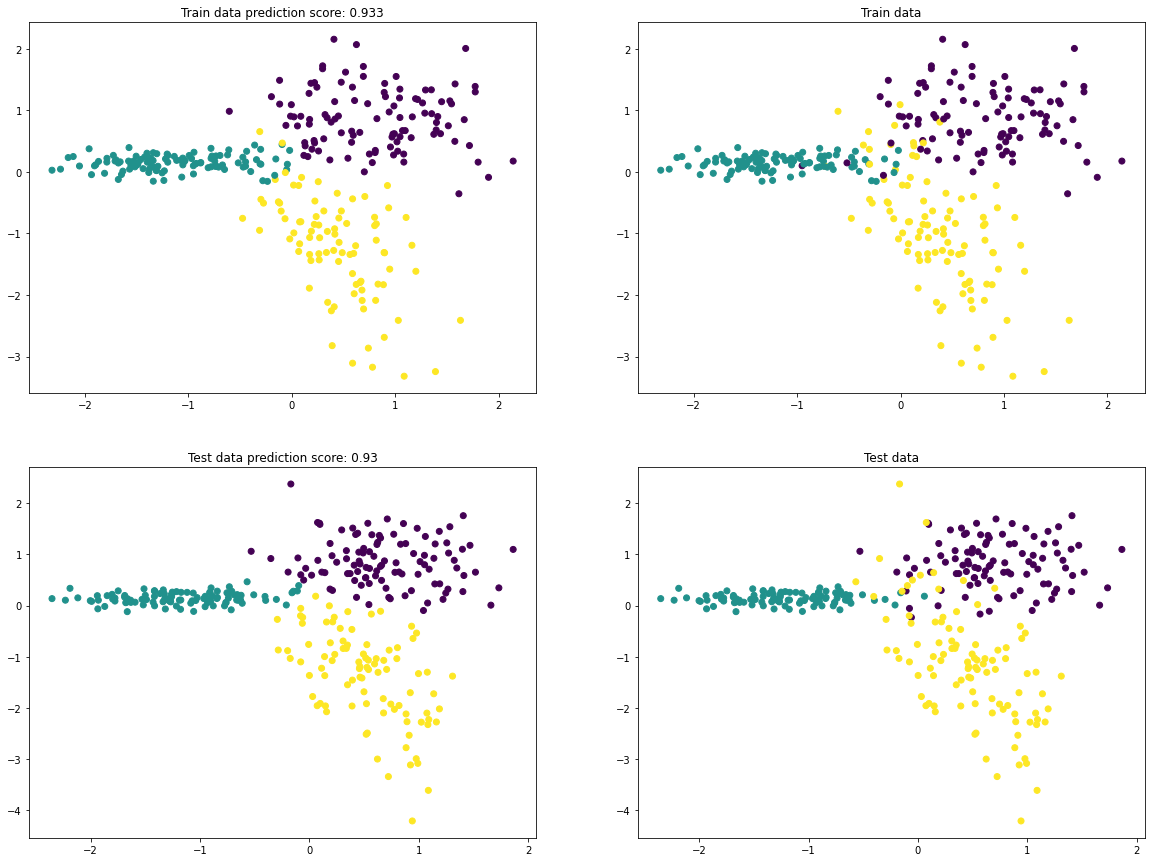

In [278]:
best=df_gauss[df_gauss["dataset"]=="three_gauss100"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_gauss100)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_gauss100[:,0],train_input_layer_gauss100[:,1],c=np.argmax(output_layer,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_gauss100,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_gauss100[:,0],train_input_layer_gauss100[:,1],c=np.argmax(train_output_layer_gauss100,axis=1))
ax1.set(title="Train data")


output_layer=mlp_test.calculate(test_input_layer_gauss100)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_gauss100[:,0],test_input_layer_gauss100[:,1],c=np.argmax(output_layer,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_gauss100,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_gauss100[:,0],test_input_layer_gauss100[:,1],c=np.argmax(test_output_layer_gauss100,axis=1))
ax3.set(title="Test data")

In [279]:
df_gauss.loc[best-1,].drop(["L1", "L2"])

model_n                           998
problem                classification
dataset                three_gauss100
columns_input                       2
columns_output                      3
rows_train                        300
rows_test                         300
layers                              3
neurons                            18
connections                       102
regularization                   None
alpha                               0
activation_function              ReLU
validate                            0
accuracy_train                  0.933
accuracy_test                    0.93
score_train                  0.104969
score_test                   0.101914
cost_function                     MSE
epochs                            400
time                        0.0318076
rate                              0.1
beta                                0
RMSprop                         False
batch                               1
seed                               27
Name: 997, d

In [280]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.798657,0.805052
cross entropy,0.854074,0.857428


In [281]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.044287,0.044730
cross entropy,0.027223,0.027228


In [282]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.876283,0.880072
sigmoid,0.682950,0.690486
tanh,0.919864,0.923161


In [283]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.017314,0.017782
sigmoid,0.059362,0.060628
tanh,0.001108,0.000959


In [379]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE                  0.918033   
                                   cross entropy        0.923167   
               sigmoid             MSE                  0.893233   
                                   cross entropy        0.922500   
               tanh                MSE                  0.923067   
                                   cross entropy        0.925133   
       10      ReLU                MSE                  0.922500   
                                   cross entropy        0.925200   
               sigmoid             MSE                  0.921700   
                                   cross entropy        0.921700   
               tanh                MSE                  0.922567   
                                   cross entropy        0.927733   
2      10      ReLU                MSE                  0.915300   
                                   cross entropy        0.926333   
               sigmoid             MSE                  0.602433   
                                   cross entropy        0.878533   
               tanh                MSE                  0.923133   
                                   cross entropy        0.924900   
3      10      ReLU                MSE                  0.798500   
                                   cross entropy        0.887200   
               sigmoid             MSE                  0.444400   
                                   cross entropy        0.586633   
               tanh                MSE                  0.902033   
                                   cross entropy        0.918567   
       18      ReLU                MSE                  0.917333   
                                   cross entropy        0.939133   
               sigmoid             MSE                  0.549033   
                                   cross entropy        0.742833   
               tanh                MSE                  0.925033   
                                   cross entropy        0.932067   
4      12      ReLU                MSE                  0.658967   
                                   cross entropy        0.783733   
               sigmoid             MSE                  0.353633   
                                   cross entropy        0.378767   
               tanh                MSE                  0.884933   
                                   cross entropy        0.929200   

                                                  accuracy_test  score_train  \
layers neurons activation_function cost_function                               
1      5       ReLU                MSE                 0.926567     0.176373   
                                   cross entropy       0.927533     0.210263   
               sigmoid             MSE                 0.906333     0.417979   
                                   cross entropy       0.927667     0.321979   
               tanh                MSE                 0.927700     0.145821   
                                   cross entropy       0.928733     0.221019   
       10      ReLU                MSE                 0.928200     0.132020   
                                   cross entropy       0.928367     0.187606   
               sigmoid             MSE                 0.926667     0.289361   
                                   cross entropy       0.925500     0.274494   
               tanh                MSE                 0.926333     0.129516   
                                   cross entropy       0.929467     0.215952   
2      10      ReLU                MSE                 0.924100     0.199848   
                                   cross entropy       0.929767     0.199290   
               sigmoid             MSE                 0.612967     0.627279   
                                   cross entropy       0.888100     0.648061   
               tanh      

In [380]:
df_gauss[df_gauss["dataset"]=="three_gauss100"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE                  0.000092   
                                   cross entropy        0.000008   
               sigmoid             MSE                  0.001350   
                                   cross entropy        0.000012   
               tanh                MSE                  0.000024   
                                   cross entropy        0.000020   
       10      ReLU                MSE                  0.000031   
                                   cross entropy        0.000015   
               sigmoid             MSE                  0.000051   
                                   cross entropy        0.000003   
               tanh                MSE                  0.000007   
                                   cross entropy        0.000007   
2      10      ReLU                MSE                  0.000391   
                                   cross entropy        0.000034   
               sigmoid             MSE                  0.040554   
                                   cross entropy        0.003937   
               tanh                MSE                  0.000015   
                                   cross entropy        0.000013   
3      10      ReLU                MSE                  0.028036   
                                   cross entropy        0.013934   
               sigmoid             MSE                  0.038119   
                                   cross entropy        0.009218   
               tanh                MSE                  0.004331   
                                   cross entropy        0.001625   
       18      ReLU                MSE                  0.000666   
                                   cross entropy        0.000058   
               sigmoid             MSE                  0.028219   
                                   cross entropy        0.010821   
               tanh                MSE                  0.000022   
                                   cross entropy        0.000053   
4      12      ReLU                MSE                  0.039278   
                                   cross entropy        0.048937   
               sigmoid             MSE                  0.009841   
                                   cross entropy        0.024779   
               tanh                MSE                  0.005553   
                                   cross entropy        0.000034   

                                                  accuracy_test   score_train  \
layers neurons activation_function cost_function                                
1      5       ReLU                MSE                 0.000052  1.815577e-03   
                                   cross entropy       0.000007  3.742745e-04   
               sigmoid             MSE                 0.001470  3.248634e-03   
                                   cross entropy       0.000005  3.997341e-04   
               tanh                MSE                 0.000008  3.889305e-05   
                                   cross entropy       0.000004  2.413695e-05   
       10      ReLU                MSE                 0.000012  4.505816e-05   
                                   cross entropy       0.000008  2.495249e-05   
               sigmoid             MSE                 0.000027  1.131502e-03   
                                   cross entropy       0.000005  2.976624e-05   
               tanh                MSE                 0.000010  1.065338e-05   
                                   cross entropy       0.000002  1.745313e-05   
2      10      ReLU                MSE                 0.000205  6.619344e-03   
                                   cross entropy       0.000012  4.202926e-04   
               sigmoid             MSE                 0.041808  8.423792e-04   
                                   cross entropy       0.004255  1.595476e-02   
       

### Three_gauss_500

In [298]:
for se in range(10):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss500,train_output_layer_gauss500,test_input_layer_gauss500,test_output_layer_gauss500,"three_gauss500",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)

start error 1109.4543569954553
end in epoch 400 with error 611.4145494055617
start error 1181.0121976491714
end in epoch 400 with error 199.60352242386688
start error 1365.6132894502798
end in epoch 400 with error 223.2019853115105
start error 1829.8872699286555
end in epoch 400 with error 451.2981699213428
start error 1901.9103689779085
end in epoch 400 with error 275.7740364293518
start error 2192.9314692654248
end in epoch 400 with error 308.44977976590303
start error 1325.3297189746577
end in epoch 400 with error 949.9168058522415
start error 1049.0136792366188
end in epoch 400 with error 309.8241461937628
start error 1042.9116771724744
end in epoch 400 with error 173.96582683203138
start error 2132.0903165900145
end in epoch 400 with error 912.5844209236293
start error 1727.4523809030643
end in epoch 400 with error 304.63097171325586
start error 1676.8853398981705
end in epoch 400 with error 287.2516971260535
start error 1129.6063277734547
end in epoch 400 with error 400.170979694

end in epoch 400 with error 330.0160514497285
start error 1083.804288278075
end in epoch 400 with error 634.0104104422718
start error 1212.9847883333
end in epoch 400 with error 285.8805068766639
start error 1330.606581824346
end in epoch 400 with error 206.61400733444026
start error 1788.417680969525
end in epoch 400 with error 434.665945004056
start error 2030.342520545743
end in epoch 400 with error 325.91769207397226
start error 2188.744245876511
end in epoch 400 with error 299.3986666489468
start error 1033.5529518129588
end in epoch 400 with error 960.4554586218251
start error 1101.9069517125636
end in epoch 400 with error 231.31721383551624
start error 985.4926103794602
end in epoch 400 with error 194.42616883376922
start error 1695.731228077007
end in epoch 400 with error 1015.5922924134921
start error 1835.6292367546766
end in epoch 400 with error 288.334984624855
start error 1623.2488925954087
end in epoch 400 with error 303.7142302984455
start error 1408.3402740827364
end in

end in epoch 400 with error 537.0496140959956
start error 1532.5946855259751
end in epoch 400 with error 301.8727527128369
start error 1319.8378222733086
end in epoch 400 with error 805.9741241560963
start error 1444.6846847124748
end in epoch 400 with error 347.9092463868162
start error 1593.809297033955
end in epoch 400 with error 222.9209703175717
start error 2098.6138472729235
end in epoch 400 with error 497.5878728371157
start error 2424.42545165975
end in epoch 400 with error 321.14430640406573
start error 2762.4452708561776
end in epoch 400 with error 300.76174713792705
start error 1026.338641883417
end in epoch 400 with error 867.938791749225
start error 734.4361595236196
end in epoch 400 with error 211.0021645567139
start error 737.9338468465594
end in epoch 400 with error 228.90734871890834
start error 1694.2176085174342
end in epoch 400 with error 964.4735540774561
start error 1260.5435103700852
end in epoch 400 with error 258.89176610099605
start error 1236.8776997971167
en

end in epoch 400 with error 1645.9376454184846
start error 1476.300978239357
end in epoch 400 with error 522.0617149409645
start error 1516.7894803865677
end in epoch 400 with error 312.01705864787664
start error 1015.2307241771757
end in epoch 400 with error 719.0079599372734
start error 1034.7201734696214
end in epoch 400 with error 284.2497811703809
start error 915.9282032244892
end in epoch 400 with error 213.37213412271163
start error 1658.723102078723
end in epoch 400 with error 513.2509817749335
start error 1664.252846722752
end in epoch 400 with error 320.5906652377571
start error 1518.3249378815112
end in epoch 400 with error 303.12886860994195
start error 1105.8240362517522
end in epoch 400 with error 945.6409794490482
start error 1278.8368575194904
end in epoch 400 with error 249.87398365004086
start error 1387.5920714817407
end in epoch 400 with error 171.9055889011166
start error 1799.427971804611
end in epoch 400 with error 1011.0828656934221
start error 2139.977904586292

[Text(0.5, 1.0, 'Test data')]

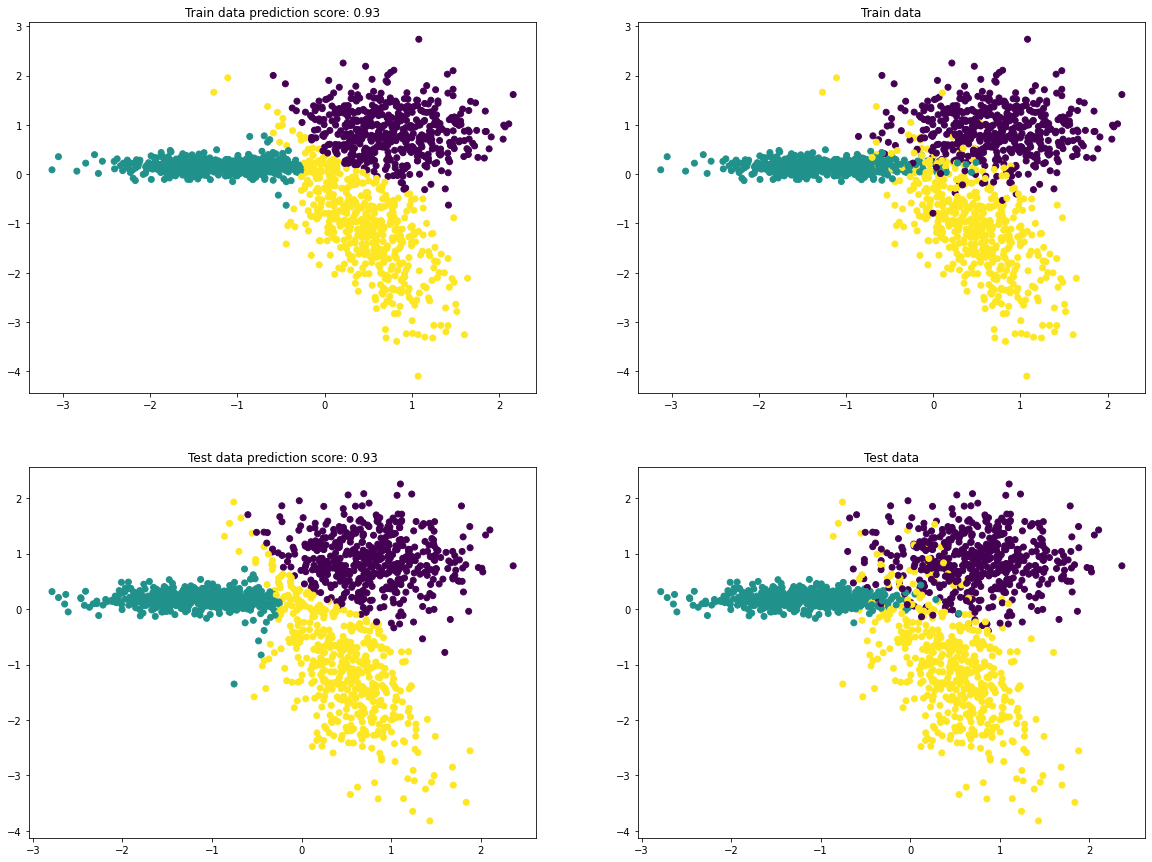

In [299]:
best=df_gauss[df_gauss["dataset"]=="three_gauss500"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_gauss500)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_gauss500[:,0],train_input_layer_gauss500[:,1],c=np.argmax(output_layer,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_gauss500,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_gauss500[:,0],train_input_layer_gauss500[:,1],c=np.argmax(train_output_layer_gauss500,axis=1))
ax1.set(title="Train data")


output_layer=mlp_test.calculate(test_input_layer_gauss500)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_gauss500[:,0],test_input_layer_gauss500[:,1],c=np.argmax(output_layer,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_gauss500,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_gauss500[:,0],test_input_layer_gauss500[:,1],c=np.argmax(test_output_layer_gauss500,axis=1))
ax3.set(title="Test data")

In [300]:
df_gauss.loc[best-1,].drop(["L1", "L2"])

model_n                          1394
problem                classification
dataset                three_gauss500
columns_input                       2
columns_output                      3
rows_train                       1500
rows_test                        1500
layers                              3
neurons                            18
connections                       102
regularization                   None
alpha                               0
activation_function              ReLU
validate                            0
accuracy_train                   0.93
accuracy_test                    0.93
score_train                  0.107116
score_test                   0.106944
cost_function                     MSE
epochs                            400
time                         0.159094
rate                              0.1
beta                                0
RMSprop                         False
batch                               1
seed                                8
Name: 1393, 

In [301]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.798050,0.799156
cross entropy,0.857628,0.858956


In [302]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.043695,0.044119
cross entropy,0.026266,0.026552


In [303]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.868500,0.869358
sigmoid,0.691667,0.692933
tanh,0.923350,0.924875


In [304]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.022230,0.022535
sigmoid,0.055164,0.055877
tanh,0.000960,0.001013


In [377]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE                    0.9197   
                                   cross entropy          0.9280   
               sigmoid             MSE                    0.8787   
                                   cross entropy          0.9251   
               tanh                MSE                    0.9254   
                                   cross entropy          0.9290   
       10      ReLU                MSE                    0.9218   
                                   cross entropy          0.9284   
               sigmoid             MSE                    0.9176   
                                   cross entropy          0.9241   
               tanh                MSE                    0.9250   
                                   cross entropy          0.9290   
2      10      ReLU                MSE                    0.9208   
                                   cross entropy          0.9316   
               sigmoid             MSE                    0.6681   
                                   cross entropy          0.8948   
               tanh                MSE                    0.9261   
                                   cross entropy          0.9300   
3      10      ReLU                MSE                    0.8377   
                                   cross entropy          0.9004   
               sigmoid             MSE                    0.4088   
                                   cross entropy          0.6112   
               tanh                MSE                    0.8988   
                                   cross entropy          0.9306   
       18      ReLU                MSE                    0.9237   
                                   cross entropy          0.9350   
               sigmoid             MSE                    0.5453   
                                   cross entropy          0.7476   
               tanh                MSE                    0.9275   
                                   cross entropy          0.9319   
4      12      ReLU                MSE                    0.5617   
                                   cross entropy          0.7132   
               sigmoid             MSE                    0.3641   
                                   cross entropy          0.4146   
               tanh                MSE                    0.8941   
                                   cross entropy          0.9328   

                                                  accuracy_test  score_train  \
layers neurons activation_function cost_function                               
1      5       ReLU                MSE                   0.9212     0.174902   
                                   cross entropy         0.9297     0.202326   
               sigmoid             MSE                   0.8799     0.429741   
                                   cross entropy         0.9259     0.307243   
               tanh                MSE                   0.9263     0.137149   
                                   cross entropy         0.9319     0.201069   
       10      ReLU                MSE                   0.9253     0.126092   
                                   cross entropy         0.9305     0.185565   
               sigmoid             MSE                   0.9192     0.272106   
                                   cross entropy         0.9278     0.251392   
               tanh                MSE                   0.9281     0.119059   
                                   cross entropy         0.9322     0.197481   
2      10      ReLU                MSE                   0.9225     0.192164   
                                   cross entropy         0.9329     0.187356   
               sigmoid             MSE                   0.6708     0.627334   
                                   cross entropy         0.8975     0.625068   
               tanh      

In [378]:
df_gauss[df_gauss["dataset"]=="three_gauss500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

accuracy_train  \
layers neurons activation_function cost_function                   
1      5       ReLU                MSE              9.890000e-05   
                                   cross entropy    2.666667e-06   
               sigmoid             MSE              3.569344e-03   
                                   cross entropy    6.322222e-06   
               tanh                MSE              8.488889e-06   
                                   cross entropy    1.333333e-06   
       10      ReLU                MSE              1.084444e-05   
                                   cross entropy    6.488889e-06   
               sigmoid             MSE              3.315556e-05   
                                   cross entropy    9.888889e-07   
               tanh                MSE              1.111111e-06   
                                   cross entropy    1.777778e-06   
2      10      ReLU                MSE              7.840000e-05   
                                   cross entropy    4.933333e-06   
               sigmoid             MSE              2.621077e-02   
                                   cross entropy    3.611956e-03   
               tanh                MSE              1.987778e-05   
                                   cross entropy    5.333333e-06   
3      10      ReLU                MSE              1.262379e-02   
                                   cross entropy    6.219822e-03   
               sigmoid             MSE              4.405773e-02   
                                   cross entropy    2.902178e-03   
               tanh                MSE              5.991956e-03   
                                   cross entropy    7.600000e-06   
       18      ReLU                MSE              3.045556e-05   
                                   cross entropy    8.444444e-06   
               sigmoid             MSE              1.651046e-02   
                                   cross entropy    1.377849e-02   
               tanh                MSE              6.500000e-06   
                                   cross entropy    2.322222e-06   
4      12      ReLU                MSE              2.920601e-02   
                                   cross entropy    8.232462e-02   
               sigmoid             MSE              9.672100e-03   
                                   cross entropy    1.852138e-02   
               tanh                MSE              4.620544e-03   
                                   cross entropy    7.733333e-06   

                                                  accuracy_test   score_train  \
layers neurons activation_function cost_function                                
1      5       ReLU                MSE                 0.000091  1.712202e-03   
                                   cross entropy       0.000006  2.301266e-04   
               sigmoid             MSE                 0.003612  6.053619e-03   
                                   cross entropy       0.000008  6.850509e-04   
               tanh                MSE                 0.000021  7.729211e-05   
                                   cross entropy       0.000003  8.296041e-06   
       10      ReLU                MSE                 0.000028  3.524819e-05   
                                   cross entropy       0.000004  2.751344e-05   
               sigmoid             MSE                 0.000019  7.364059e-04   
                                   cross entropy       0.000002  3.043097e-05   
               tanh                MSE                 0.000006  8.775330e-06   
                                   cross entropy       0.000001  8.112543e-06   
2      10      ReLU                MSE                 0.000072  5.667700e-03   
                                   cross entropy       0.000004  1.461287e-04   
               sigmoid             MSE                 0.027186  7.106785e-04   
                                   cross entropy       0.003521  1.064440e-02   
       

In [ ]:
# ReLU / tanh + cross_entropy + 3 layers and 18 neurons are the most promising

### Three_gauss_1000

In [ ]:
# puścić

In [305]:
for se in range(10):
    for L in [[6,6,6]]:
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss1000,train_output_layer_gauss1000,test_input_layer_gauss1000,test_output_layer_gauss1000,"three_gauss1000",2,3,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.cross_entropy,"cross_entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss1000,train_output_layer_gauss1000,test_input_layer_gauss1000,test_output_layer_gauss1000,"three_gauss1000",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)

start error 1990.8262662454008
end in epoch 400 with error 407.1942663964812
start error 3415.850623203922
end in epoch 400 with error 562.1940116748182
start error 2309.0000130976155
end in epoch 400 with error 551.3944746658377
start error 2935.8298032008756
end in epoch 400 with error 583.4317656346236
start error 1698.8693378980515
end in epoch 400 with error 525.5914110244678
start error 2956.261494776278
end in epoch 400 with error 595.7064535263883
start error 1734.9422992649074
end in epoch 400 with error 460.91117439537595
start error 2889.6877011056017
end in epoch 400 with error 603.1945977299785
start error 2495.9281331885745
end in epoch 400 with error 465.2798263041765
start error 3224.118046067414
end in epoch 400 with error 592.1237423721475
start error 1846.2047664189836
end in epoch 400 with error 471.2640277211569
start error 3431.505807733333
end in epoch 400 with error 563.427340119932
start error 2723.2020185009806
end in epoch 400 with error 443.64213814974863
st

[Text(0.5, 1.0, 'Test data')]

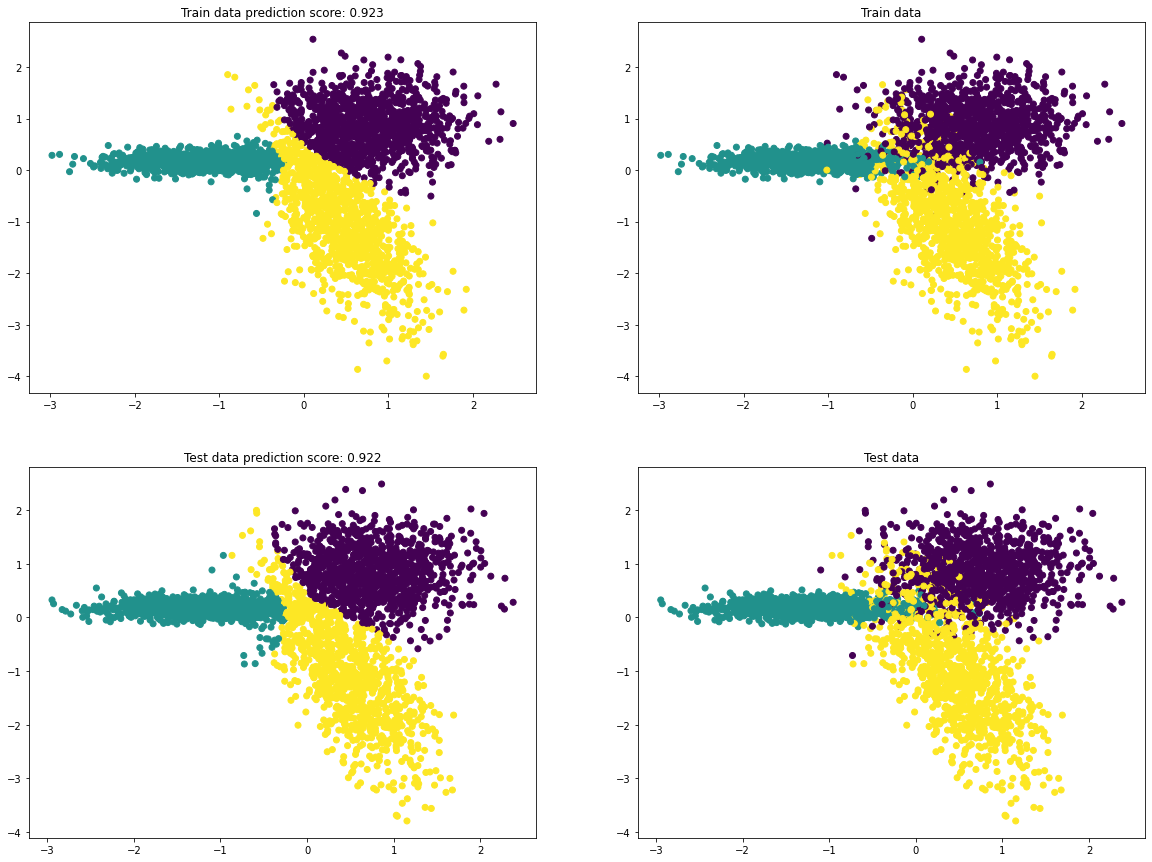

In [306]:
best=df_gauss[df_gauss["dataset"]=="three_gauss1000"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_gauss1000)
fig=plt.figure(figsize=(20,15))
ax=fig.add_subplot(221)
ax.scatter(train_input_layer_gauss1000[:,0],train_input_layer_gauss1000[:,1],c=np.argmax(output_layer,axis=1))
ax.set(title='Train data prediction score: '+str(round(np.mean(np.argmax(train_output_layer_gauss1000,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax1=fig.add_subplot(222)
ax1.scatter(train_input_layer_gauss1000[:,0],train_input_layer_gauss1000[:,1],c=np.argmax(train_output_layer_gauss1000,axis=1))
ax1.set(title="Train data")


output_layer=mlp_test.calculate(test_input_layer_gauss1000)

ax2=fig.add_subplot(223)
ax2.scatter(test_input_layer_gauss1000[:,0],test_input_layer_gauss1000[:,1],c=np.argmax(output_layer,axis=1))
ax2.set(title='Test data prediction score: '+str(round(np.mean(np.argmax(test_output_layer_gauss1000,axis=1)==np.argmax(output_layer,axis=1)),3)))

ax3=fig.add_subplot(224)
ax3.scatter(test_input_layer_gauss1000[:,0],test_input_layer_gauss1000[:,1],c=np.argmax(test_output_layer_gauss1000,axis=1))
ax3.set(title="Test data")

In [307]:
df_gauss.loc[best-1,].drop(["L1", "L2"])

model_n                           1457
problem                 classification
dataset                three_gauss1000
columns_input                        2
columns_output                       3
rows_train                        3000
rows_test                         3000
layers                               3
neurons                             18
connections                        102
regularization                    None
alpha                                0
activation_function               ReLU
validate                             0
accuracy_train                   0.923
accuracy_test                    0.922
score_train                   0.113047
score_test                    0.115933
cost_function                      MSE
epochs                             400
time                          0.283705
rate                               0.1
beta                                 0
RMSprop                          False
batch                                1
seed                     

In [308]:
df_gauss[df_gauss["dataset"]=="three_gauss1000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.9227,0.9196
cross entropy,0.9292,0.9272


In [309]:
df_gauss[df_gauss["dataset"]=="three_gauss1000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
MSE,0.000025,0.000036
cross entropy,0.000010,0.000001


In [310]:
df_gauss[df_gauss["dataset"]=="three_gauss1000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.9227,0.9196
tanh,0.9292,0.9272


In [311]:
df_gauss[df_gauss["dataset"]=="three_gauss1000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

,accuracy_train,accuracy_test
activation_function,,
ReLU,0.000025,0.000036
tanh,0.000010,0.000001


### Three_gauss_10000

In [486]:
for se in range(10):
    for L in [[6,6,6]]:
        df_gauss=Generate_network_scores(df_gauss,train_input_layer_gauss10000,train_output_layer_gauss10000,test_input_layer_gauss10000,test_output_layer_gauss10000,"three_gauss10000",2,3,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.cross_entropy,"cross entropy",mlp.cross_entropy_grad,networks,networks_err,problem="classification",seed=se)

start error 34214.84604014801
end in epoch 400 with error 5435.384957168781
start error 29334.02969295344
end in epoch 400 with error 5853.777932098076
start error 29599.08755631559
end in epoch 400 with error 5821.122802328532
start error 28991.423934220387
end in epoch 400 with error 5860.464950691505
start error 32299.770704648803
end in epoch 400 with error 5798.942450452425
start error 34402.54700880912


KeyboardInterrupt: 

In [489]:
df_gauss[df_gauss["dataset"]=="three_gauss10000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

,accuracy_train,accuracy_test
cost_function,,
cross entropy,0.9318,0.9304


In [490]:
df_gauss[df_gauss["dataset"]=="three_gauss10000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

,accuracy_train,accuracy_test
cost_function,,
cross entropy,0.000003,0.000004


In [491]:
df_gauss[df_gauss["dataset"]=="three_gauss10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

,accuracy_train,accuracy_test
activation_function,,
tanh,0.9318,0.9304


In [ ]:
df_gauss[df_gauss["dataset"]=="three_gauss10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

# Regression

## Activation

### Activation 100

In [313]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.train.100.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_act100=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_act100=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [317]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.test.100.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_act100=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_act100=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [320]:
df_act=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch"])

MAX_EPOCH=400

ITER=10

networks=[]

networks_names=[]

networks_err=[]

model_n=0

In [321]:
for se in range(ITER):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act100,train_output_layer_act100,test_input_layer_act100,test_output_layer_act100,"activation100",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)

start error 155.86756868346518
end in epoch 400 with error 5.7713000310063745
start error 81.10056374894819
end in epoch 400 with error 0.23689297133309606
start error 57.82476273513588
end in epoch 400 with error 0.5347093091219823
start error 83.73937734867319
end in epoch 400 with error 12.335768411842917
start error 77.07803048101252
end in epoch 400 with error 10.756060722151583
start error 66.83826226404116
end in epoch 400 with error 6.830132802405681
start error 120.20922683681187
end in epoch 400 with error 3.3442217936050556
start error 94.93615573051022
end in epoch 400 with error 0.1542696503935875
start error 69.19520062591143
end in epoch 400 with error 0.0008601982510704826
start error 100.86004260434886
end in epoch 400 with error 18.13395513650868
start error 85.49388488341492
end in epoch 400 with error 11.397762650709417
start error 72.84602708020182
end in epoch 400 with error 4.226856310250799
start error 82.09644026788716
end in epoch 400 with error 7.107470794744

end in epoch 400 with error 32.61312625520372
start error 83.30181279436933
end in epoch 400 with error 10.310991627978597
start error 164.9909072716489
end in epoch 400 with error 5.73744657291867
start error 108.57554486517591
end in epoch 400 with error 0.12224022316268243
start error 114.21143184651129
end in epoch 400 with error 0.3470292429954622
start error 116.75912469353328
end in epoch 400 with error 10.443159652852074
start error 93.56368514626419
end in epoch 400 with error 11.784332841008407
start error 94.51664040044784
end in epoch 400 with error 7.201056614210602
start error 180.98486966164506
end in epoch 400 with error 6.958374018472245
start error 107.64653838284639
end in epoch 400 with error 0.2902505649167414
start error 204.454644716146
end in epoch 400 with error 0.005139336071531875
start error 92.1183157994447
end in epoch 400 with error 11.89884943737422
start error 90.46016673821764
end in epoch 400 with error 41.99100253987981
start error 127.89421596005471

end in epoch 400 with error 83.3950988400361
start error 88.17741317192973
end in epoch 69 with error 83.65400382615411
start error 81.711332609545
end in epoch 400 with error 9.909438571561328
start error 94.68736328632365
end in epoch 400 with error 4.490860193860968
start error 86.93980897330198
end in epoch 400 with error 0.2937267818237286
start error 85.93917326444036
end in epoch 400 with error 0.16410376598593363
start error 85.69549887357087
end in epoch 400 with error 11.437305789932626
start error 82.52803248759255
end in epoch 400 with error 7.993857706017984
start error 81.22541106695654
end in epoch 400 with error 6.607987903101266
start error 156.10360032692284
end in epoch 400 with error 4.644531548102778
start error 132.56530438409922
end in epoch 400 with error 0.07867109896272434
start error 148.63906763386197
end in epoch 400 with error 0.024036744187840794
start error 87.83104974503064
end in epoch 400 with error 13.817196713519436
start error 101.80210152293824
en

end in epoch 400 with error 0.08611624840835354
start error 112.59704813895605
end in epoch 74 with error 83.47360078350405
start error 88.17741317192973
end in epoch 69 with error 83.65400382615411
start error 46.24783153691164
end in epoch 400 with error 14.730215502423313
start error 189.79190711009826
end in epoch 400 with error 3.44082744309382
start error 43.581887813336174
end in epoch 400 with error 0.3082190019365983
start error 10.523894331716198
end in epoch 400 with error 0.20166869900702955
start error 121.34320548396536
end in epoch 400 with error 8.174469220753746
start error 61.01407598163708
end in epoch 400 with error 15.535765505243727
start error 28.78402226656852
end in epoch 400 with error 9.450500793223078
start error 97.49051476868966
end in epoch 400 with error 4.2004719081551745
start error 63.334984514074364
end in epoch 400 with error 0.1489531749992045
start error 12.951757473023525
end in epoch 400 with error 0.027733487749656664
start error 77.43160566398

[Text(0.5, 1.0, 'Test data score: 0.0')]

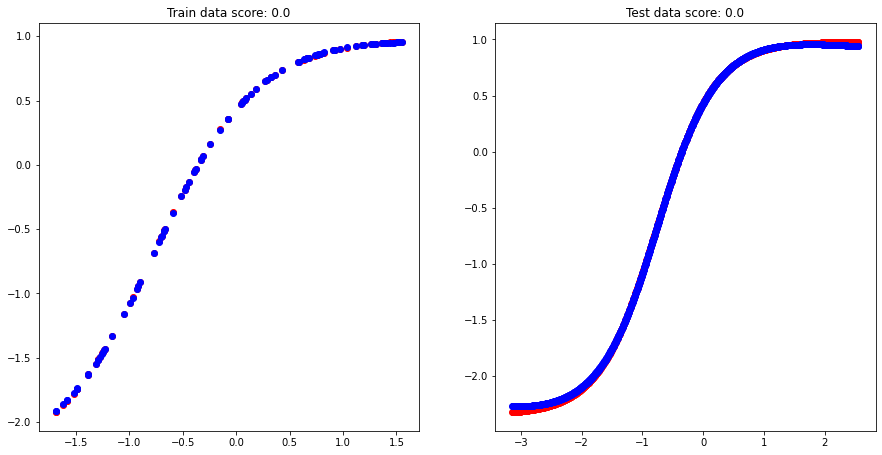

In [323]:
best=df_act[df_act["dataset"]=="activation100"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_act100)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_act100, train_output_layer_act100, color='r')
ax.scatter(train_input_layer_act100,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_act100,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_act100)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_act100, test_output_layer_act100, color='r')
ax1.scatter(test_input_layer_act100,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_act100,output_layer)/output_layer.shape[0],3)))

In [324]:
df_act.loc[best-1,].drop(["L1", "L2"])

model_n                            9
problem                   regression
dataset                activation100
columns_input                      1
columns_output                     1
rows_train                       100
rows_test                       1201
layers                             2
neurons                           10
connections                       35
regularization                  None
alpha                              0
activation_function             tanh
validate                           0
accuracy_train                     0
accuracy_test                      0
score_train              8.60198e-06
score_test               0.000333795
cost_function                    MSE
epochs                           400
time                      0.00679143
rate                             0.1
beta                               0
RMSprop                        False
batch                              1
seed                               0
Name: 8, dtype: object

In [326]:
df_act[df_act["dataset"]=="activation100"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.247788,0.368594
MSE,0.161410,0.371482


In [327]:
df_act[df_act["dataset"]=="activation100"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.062979,0.136918
MSE,0.113970,0.408201


In [328]:
df_act[df_act["dataset"]=="activation100"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').mean()

,score_train,score_test
activation_function,,
ReLU,0.179178,0.389953
sigmoid,0.382989,0.648575
tanh,0.051630,0.071586


In [329]:
df_act[df_act["dataset"]=="activation100"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').var()

,score_train,score_test
activation_function,,
ReLU,0.077224,0.190245
sigmoid,0.135197,0.455955
tanh,0.003051,0.005319


In [385]:
df_act[df_act["dataset"]=="activation100"][['layers', 'neurons','activation_function','cost_function','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

score_train  score_test
layers neurons activation_function cost_function                         
1      5       ReLU                MAE               0.139651    0.294984
                                   MSE               0.002198    0.234219
               sigmoid             MAE               0.116883    0.125080
                                   MSE               0.044987    0.078309
               tanh                MAE               0.079618    0.098447
                                   MSE               0.002473    0.005302
       10      ReLU                MAE               0.104609    0.308848
                                   MSE               0.001800    0.238513
               sigmoid             MAE               0.181184    0.192686
                                   MSE               0.058723    0.105404
               tanh                MAE               0.096861    0.116682
                                   MSE               0.000578    0.002755
2      10      ReLU                MAE               0.192555    0.305673
                                   MSE               0.004248    0.163523
               sigmoid             MAE               0.142068    0.147917
                                   MSE               0.038832    0.086567
               tanh                MAE               0.079746    0.113572
                                   MSE               0.000317    0.003235
3      10      ReLU                MAE               0.344476    0.509821
                                   MSE               0.201513    0.482091
               sigmoid             MAE               0.766011    1.144845
                                   MSE               0.869465    1.701755
               tanh                MAE               0.114736    0.158008
                                   MSE               0.000461    0.005171
       18      ReLU                MAE               0.184534    0.264229
                                   MSE               0.001227    0.179619
               sigmoid             MAE               0.286932    0.465405
                                   MSE               0.256694    0.561355
               tanh                MAE               0.124958    0.163868
                                   MSE               0.000475    0.004541
4      12      ReLU                MAE               0.550700    0.806835
                                   MSE               0.422624    0.891078
               sigmoid             MAE               0.835950    1.237350
                                   MSE               0.998141    1.936222
               tanh                MAE               0.118718    0.180434
                                   MSE               0.000621    0.007021

In [386]:
df_act[df_act["dataset"]=="activation100"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

score_train  score_test
layers neurons activation_function cost_function                          
1      5       ReLU                MAE            4.142300e-03    0.005348
                                   MSE            4.581465e-07    0.006764
               sigmoid             MAE            5.048930e-04    0.000366
                                   MSE            9.781989e-05    0.000257
               tanh                MAE            1.651772e-04    0.000312
                                   MSE            2.047183e-06    0.000005
       10      ReLU                MAE            4.757728e-04    0.002871
                                   MSE            4.689435e-07    0.004500
               sigmoid             MAE            2.234366e-03    0.000766
                                   MSE            8.796682e-05    0.000537
               tanh                MAE            5.952903e-04    0.001561
                                   MSE            3.063454e-07    0.000005
2      10      ReLU                MAE            1.164162e-02    0.010550
                                   MSE            5.952043e-05    0.012648
               sigmoid             MAE            2.153476e-03    0.001619
                                   MSE            3.130848e-04    0.002676
               tanh                MAE            1.060845e-03    0.000846
                                   MSE            7.439197e-08    0.000007
3      10      ReLU                MAE            1.063017e-01    0.168722
                                   MSE            1.771072e-01    0.597294
               sigmoid             MAE            7.192446e-03    0.011564
                                   MSE            2.927293e-02    0.092991
               tanh                MAE            6.798238e-04    0.000263
                                   MSE            3.509731e-08    0.000007
       18      ReLU                MAE            4.714330e-03    0.011166
                                   MSE            1.419157e-06    0.012767
               sigmoid             MAE            1.819626e-02    0.055416
                                   MSE            6.137134e-02    0.229219
               tanh                MAE            7.797233e-04    0.001213
                                   MSE            1.191672e-07    0.000007
4      12      ReLU                MAE            7.146627e-02    0.156292
                                   MSE            2.479458e-01    0.827669
               sigmoid             MAE            1.046482e-06    0.000003
                                   MSE            1.032649e-05    0.000048
               tanh                MAE            4.266689e-04    0.000278
                                   MSE            1.238454e-07    0.000010

### Activation 500

In [330]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.train.500.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_act500=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_act500=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [333]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.test.500.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_act500=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_act500=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [334]:
for se in range(10):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_act=Generate_network_scores(df_act,train_input_layer_act500,train_output_layer_act500,test_input_layer_act500,test_output_layer_act500,"activation500",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)

start error 779.5041754428819
end in epoch 400 with error 26.281538177866494
start error 404.08184452385996
end in epoch 400 with error 1.3057351951178644
start error 289.7994980406441
end in epoch 400 with error 1.4991590970994724
start error 429.72746172593895
end in epoch 400 with error 85.25475634443848
start error 388.5698780846413
end in epoch 400 with error 41.61157795210255
start error 336.6324758376324
end in epoch 400 with error 46.77346480517993
start error 601.1173640432775
end in epoch 400 with error 14.638406049042707
start error 474.28971766388486
end in epoch 400 with error 0.5685919759326503
start error 347.0693407182282
end in epoch 400 with error 0.008331288662443896
start error 501.976184737445
end in epoch 400 with error 75.24063308834661
start error 430.0464672082934
end in epoch 400 with error 76.82437609373224
start error 367.035886283365
end in epoch 400 with error 72.1977835654028
start error 410.8299149401253
end in epoch 400 with error 34.23093064389944
star

end in epoch 400 with error 62.95095986991496
start error 824.7472446557429
end in epoch 400 with error 26.60424146284798
start error 550.2157434382876
end in epoch 400 with error 0.4048049163727733
start error 570.3384810776031
end in epoch 400 with error 1.0643149342167795
start error 576.3573219401335
end in epoch 400 with error 62.55530465481771
start error 468.2566865831939
end in epoch 400 with error 62.23654739852409
start error 474.60776175116996
end in epoch 400 with error 38.57398336403766
start error 904.8199678789674
end in epoch 400 with error 32.1078472167318
start error 536.8295185586658
end in epoch 400 with error 1.6465376962836467
start error 1017.2902113955525
end in epoch 400 with error 0.0280253962838193
start error 472.7291365923835
end in epoch 400 with error 54.96798585875233
start error 454.82510736040007
end in epoch 400 with error 36.28509266835005
start error 637.9330628150238
end in epoch 400 with error 44.703367282338135
start error 834.5021562157815
end i

end in epoch 106 with error 423.69290363033235
start error 411.38063742609097
end in epoch 400 with error 52.864969523075885
start error 473.6237492503095
end in epoch 400 with error 20.071565581953287
start error 435.3447142137968
end in epoch 400 with error 1.7612877181286541
start error 430.32882268720306
end in epoch 400 with error 0.6682341788114051
start error 431.06759030833774
end in epoch 400 with error 45.80297102606407
start error 415.2936793773222
end in epoch 400 with error 59.46739454500633
start error 408.98791215313884
end in epoch 400 with error 25.51560820646727
start error 780.4898673314367
end in epoch 400 with error 20.742280642174062
start error 662.8146063538577
end in epoch 400 with error 0.5278497816006927
start error 741.1101187534732
end in epoch 400 with error 0.13531266814405596
start error 447.6483129987801
end in epoch 400 with error 67.89943811220309
start error 510.91480413726424
end in epoch 400 with error 76.61318150823749
start error 542.278813840772

end in epoch 106 with error 423.69290363033235
start error 234.2166932454888
end in epoch 400 with error 69.8464910334387
start error 951.8299501959783
end in epoch 400 with error 15.041237003143298
start error 219.03152519127713
end in epoch 400 with error 1.320397616964576
start error 48.083618761207546
end in epoch 400 with error 0.7001223821815157
start error 608.8656485709096
end in epoch 400 with error 43.03803147698344
start error 300.341742187862
end in epoch 400 with error 69.0113945209208
start error 137.3810481956115
end in epoch 400 with error 40.93247145660959
start error 487.551953412406
end in epoch 400 with error 18.672359281753177
start error 320.4710993929739
end in epoch 400 with error 0.9519541805037781
start error 60.097737853635294
end in epoch 400 with error 0.16629297320846298
start error 391.2555227640438
end in epoch 400 with error 115.30181319116437
start error 363.4357638768947
end in epoch 400 with error 56.96963197984102
start error 130.5394449040071
end i

[Text(0.5, 1.0, 'Test data score: 0.0')]

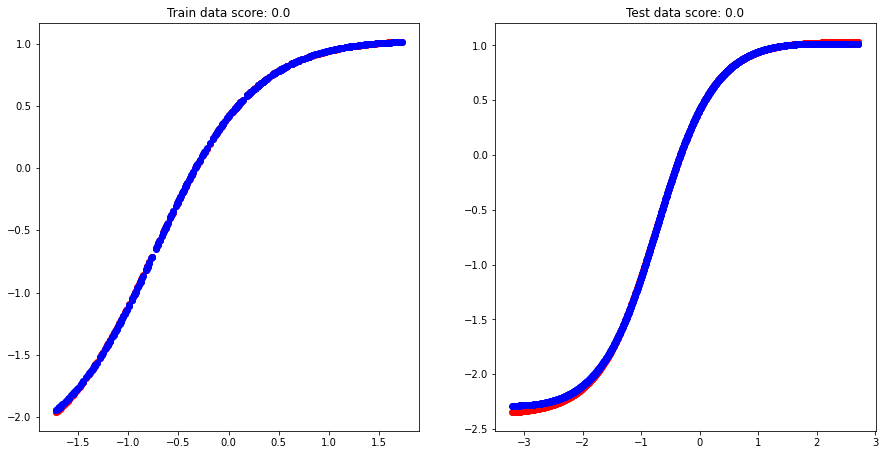

In [335]:
best=df_act[df_act["dataset"]=="activation500"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_act500)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_act500, train_output_layer_act500, color='r')
ax.scatter(train_input_layer_act500,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_act500,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_act500)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_act500, test_output_layer_act500, color='r')
ax1.scatter(test_input_layer_act500,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_act500,output_layer)/output_layer.shape[0],3)))

In [336]:
df_act.loc[best-1,].drop(["L1", "L2"])

model_n                          369
problem                   regression
dataset                activation500
columns_input                      1
columns_output                     1
rows_train                       500
rows_test                       1201
layers                             2
neurons                           10
connections                       35
regularization                  None
alpha                              0
activation_function             tanh
validate                           0
accuracy_train                     0
accuracy_test                      0
score_train              1.66626e-05
score_test               0.000414979
cost_function                    MSE
epochs                           400
time                        0.068347
rate                             0.1
beta                               0
RMSprop                        False
batch                              1
seed                               0
Name: 368, dtype: object

In [338]:
df_act[df_act["dataset"]=="activation500"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.242568,0.378241
MSE,0.160899,0.384332


In [339]:
df_act[df_act["dataset"]=="activation500"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.064519,0.140781
MSE,0.114514,0.440293


In [340]:
df_act[df_act["dataset"]=="activation500"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').mean()

,score_train,score_test
activation_function,,
ReLU,0.165144,0.402229
sigmoid,0.386886,0.669394
tanh,0.053170,0.072237


In [341]:
df_act[df_act["dataset"]=="activation500"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').var()

,score_train,score_test
activation_function,,
ReLU,0.074323,0.199343
sigmoid,0.138541,0.488816
tanh,0.003307,0.005462


In [387]:
df_act[df_act["dataset"]=="activation500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

score_train  score_test
layers neurons activation_function cost_function                         
1      5       ReLU                MAE               0.127740    0.304332
                                   MSE               0.002283    0.239773
               sigmoid             MAE               0.111376    0.130959
                                   MSE               0.040556    0.075501
               tanh                MAE               0.082663    0.088282
                                   MSE               0.001725    0.005501
       10      ReLU                MAE               0.097037    0.328492
                                   MSE               0.002010    0.235780
               sigmoid             MAE               0.207982    0.197196
                                   MSE               0.054747    0.102617
               tanh                MAE               0.088680    0.113605
                                   MSE               0.000458    0.001953
2      10      ReLU                MAE               0.150624    0.308653
                                   MSE               0.003315    0.164227
               sigmoid             MAE               0.131200    0.160566
                                   MSE               0.034712    0.086577
               tanh                MAE               0.086975    0.128547
                                   MSE               0.000353    0.003499
3      10      ReLU                MAE               0.350082    0.502689
                                   MSE               0.201599    0.494832
               sigmoid             MAE               0.783096    1.170909
                                   MSE               0.872541    1.768520
               tanh                MAE               0.120378    0.163104
                                   MSE               0.000504    0.005024
       18      ReLU                MAE               0.110679    0.314981
                                   MSE               0.001093    0.182910
               sigmoid             MAE               0.301020    0.482647
                                   MSE               0.260598    0.592309
               tanh                MAE               0.108998    0.155206
                                   MSE               0.000490    0.004545
4      12      ReLU                MAE               0.514890    0.809274
                                   MSE               0.420379    0.940800
               sigmoid             MAE               0.846638    1.257972
                                   MSE               0.998168    2.006959
               tanh                MAE               0.146169    0.190919
                                   MSE               0.000651    0.006653

In [388]:
df_act[df_act["dataset"]=="activation500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

score_train  score_test
layers neurons activation_function cost_function                          
1      5       ReLU                MAE            3.843890e-03    0.003887
                                   MSE            6.724102e-07    0.006872
               sigmoid             MAE            6.016231e-04    0.000826
                                   MSE            9.145407e-05    0.000226
               tanh                MAE            2.572992e-04    0.000194
                                   MSE            5.922950e-07    0.000005
       10      ReLU                MAE            5.982745e-04    0.002200
                                   MSE            6.229412e-07    0.004443
               sigmoid             MAE            9.079871e-04    0.000614
                                   MSE            1.063784e-04    0.000642
               tanh                MAE            1.668842e-04    0.000588
                                   MSE            1.612379e-07    0.000002
2      10      ReLU                MAE            9.736987e-03    0.005394
                                   MSE            1.816945e-05    0.013244
               sigmoid             MAE            3.321809e-03    0.000896
                                   MSE            2.823835e-04    0.002845
               tanh                MAE            8.648770e-04    0.000691
                                   MSE            8.318409e-08    0.000007
3      10      ReLU                MAE            7.531335e-02    0.167872
                                   MSE            1.770686e-01    0.645760
               sigmoid             MAE            6.188610e-03    0.010713
                                   MSE            2.808380e-02    0.095734
               tanh                MAE            7.096364e-04    0.000379
                                   MSE            4.894240e-08    0.000008
       18      ReLU                MAE            2.704965e-03    0.008991
                                   MSE            2.549376e-07    0.014001
               sigmoid             MAE            3.005514e-02    0.076234
                                   MSE            6.352698e-02    0.250747
               tanh                MAE            4.706233e-04    0.000902
                                   MSE            1.148843e-07    0.000007
4      12      ReLU                MAE            8.769896e-02    0.163266
                                   MSE            2.496748e-01    0.861332
               sigmoid             MAE            1.415913e-06    0.000003
                                   MSE            1.007607e-05    0.000050
               tanh                MAE            1.162614e-03    0.000666
                                   MSE            1.464852e-07    0.000010

In [ ]:
# tanh+mse+1 layer and 10 neurons

### Activation 1000

In [395]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.train.1000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_act1000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_act1000=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [396]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.test.1000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_act1000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_act1000=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [397]:
# puscic

In [399]:
for se in range(10):
    for L in [[10]]:
        df_act=Generate_network_scores(df_act,train_input_layer_act1000,train_output_layer_act1000,test_input_layer_act1000,test_output_layer_act1000,"activation1000a",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)

start error 112.66455060510174
end in epoch 400 with error 0.25741470576941755
start error 121.11420528157365
end in epoch 400 with error 0.18237628695975838
start error 2166.7306499328142
end in epoch 400 with error 0.24294320958667892
start error 91.80438364653868
end in epoch 400 with error 0.5570764048663257
start error 207.6630588770696
end in epoch 400 with error 0.33634370443601413
start error 1155.4238374495742
end in epoch 400 with error 0.12989429674791725
start error 1691.5269609628253
end in epoch 400 with error 0.45820609214762636
start error 3055.2320194143076
end in epoch 400 with error 0.37299222030532964
start error 489.1769609241892
end in epoch 400 with error 1.2834781040930587
start error 629.0711622541346
end in epoch 400 with error 0.10722214430118761


[Text(0.5, 1.0, 'Test data score: 0.0')]

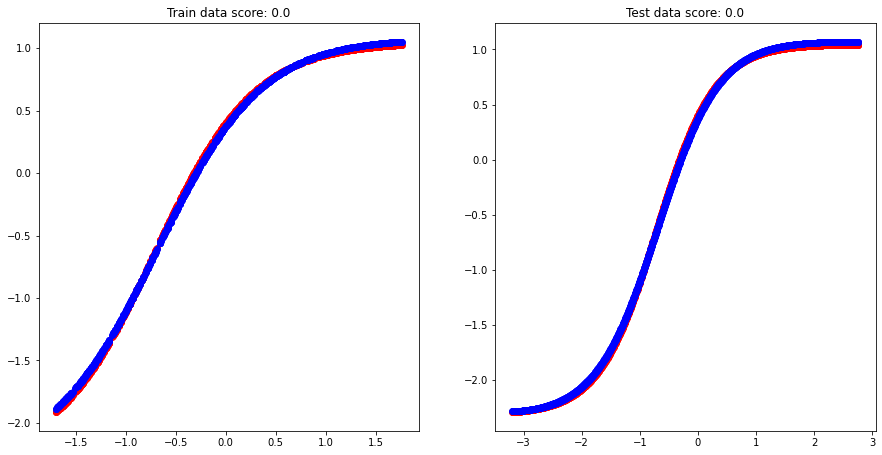

In [400]:
best=df_act[df_act["dataset"]=="activation1000a"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_act1000)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_act1000, train_output_layer_act1000, color='r')
ax.scatter(train_input_layer_act1000,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_act1000,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_act1000)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_act1000, test_output_layer_act1000, color='r')
ax1.scatter(test_input_layer_act1000,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_act1000,output_layer)/output_layer.shape[0],3)))

In [407]:
df_act[df_act['dataset']=="activation1000a"]

,model_n,problem,dataset,columns_input,columns_output,rows_train,rows_test,layers,neurons,connections,L1,L2,regularization,alpha,activation_function,validate,accuracy_train,accuracy_test,score_train,score_test,cost_function,epochs,time,rate,beta,RMSprop,batch,seed
731,741,regression,activation1000a,1,1,1000,1201,1,10,20,0.398538,0.518087,None,0,tanh,0,0,0,0.000257,0.000628,MSE,400,0.042363,0.1,0,False,1,0.0
732,742,regression,activation1000a,1,1,1000,1201,1,10,20,0.364721,0.512378,None,0,tanh,0,0,0,0.000182,0.000524,MSE,400,0.040672,0.1,0,False,1,1.0
733,743,regression,activation1000a,1,1,1000,1201,1,10,20,0.320010,0.437468,None,0,tanh,0,0,0,0.000243,0.000853,MSE,400,0.037369,0.1,0,False,1,2.0
734,744,regression,activation1000a,1,1,1000,1201,1,10,20,0.337587,0.473941,None,0,tanh,0,0,0,0.000557,0.002124,MSE,400,0.039508,0.1,0,False,1,3.0
735,745,regression,activation1000a,1,1,1000,1201,1,10,20,0.537838,0.650234,None,0,tanh,0,0,0,0.000336,0.002608,MSE,400,0.042256,0.1,0,False,1,4.0
736,746,regression,activation1000a,1,1,1000,1201,1,10,20,0.349226,0.487232,None,0,tanh,0,0,0,0.000130,0.001713,MSE,400,0.041648,0.1,0,False,1,5.0
737,747,regression,activation1000a,1,1,1000,1201,1,10,20,0.374386,0.499769,None,0,tanh,0,0,0,0.000458,0.000445,MSE,400,0.036833,0.1,0,False,1,6.0
738,748,regression,activation1000a,1,1,1000,1201,1,10,20,0.442515,0.581964,None,0,tanh,0,0,0,0.000373,0.003942,MSE,400,0.036573,0.1,0,False,1,7.0
739,749,regression,activation1000a,1,1,1000,1201,1,10,20,0.341525,0.475165,None,0,tanh,0,0,0,0.001283,0.003856,MSE,400,0.037474,0.1,0,False,1,8.0
740,750,regression,activation1000a,1,1,1000,1201,1,10,20,0.410537,0.532793,None,0,tanh,0,0,0,0.000107,0.001548,MSE,400,0.037524,0.1,0,False,1,9.0


In [403]:
df_act[df_act["dataset"]=="activation1000a"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MSE,0.000393,0.001824


In [404]:
df_act[df_act["dataset"]=="activation1000a"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MSE,1.182100e-07,0.000002


In [405]:
df_act[df_act["dataset"]=="activation1000a"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').mean()

,score_train,score_test
activation_function,,
tanh,0.000393,0.001824


In [ ]:
df_act[df_act["dataset"]=="activation1000a"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').var()

### Activation 10000

In [ ]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.train.10000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_act10000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_act10000=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [ ]:
test = np.loadtxt("Project 1 datasets/regression/data.activation.test.10000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_act10000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_act10000=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [ ]:
# puscic

In [ ]:
for se in range(10):
    for L in [[10]]:
        df_act=Generate_network_scores(df_act,train_input_layer_act10000,train_output_layer_act10000,test_input_layer_act10000,test_output_layer_act10000,"activation10000",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        

In [ ]:
best=df_act[df_act["dataset"]=="activation10000"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_act10000)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_act10000, train_output_layer_act10000, color='r')
ax.scatter(train_input_layer_act10000,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_act10000,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_act10000)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_act10000, test_output_layer_act10000, color='r')
ax1.scatter(test_input_layer_act10000,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_act10000,output_layer)/output_layer.shape[0],3)))

In [ ]:
df_act.loc[best-1,].drop(["L1", "L2"])

In [ ]:
df_act[df_act["dataset"]=="activation10000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').mean()

In [ ]:
df_act[df_act["dataset"]=="activation10000"][['cost_function', 'accuracy_train', 'accuracy_test']].groupby('cost_function').var()

In [ ]:
df_act[df_act["dataset"]=="activation10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

In [ ]:
df_act[df_act["dataset"]=="activation10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

## Cube

### Cube 100

In [347]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.train.100.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_cb100=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_cb100=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [348]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.test.100.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_cb100=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_cb100=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [349]:
df_cube=pd.DataFrame(columns=["model_n","problem","dataset","columns_input","columns_output",
                  "rows_train","rows_test","layers","neurons","connections",
                  "L1","L2","regularization","alpha","activation_function",
                         "validate","accuracy_train","accuracy_test","score_train","score_test","cost_function",
                         "epochs","time","rate","beta","RMSprop","batch"])

MAX_EPOCH=400

ITER=30

networks=[]

networks_names=[]

networks_err=[]

model_n=0

In [350]:
for se in range(10):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb100,train_output_layer_cb100,test_input_layer_cb100,test_output_layer_cb100,"cube100",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)

start error 157.6974263053595
end in epoch 400 with error 34.43130747966895
start error 85.30435555810274
end in epoch 400 with error 7.731799024510057
start error 65.1581370839645
end in epoch 400 with error 21.736568433861873
start error 88.90495861238294
end in epoch 400 with error 44.633193001321324
start error 61.82003679287086
end in epoch 400 with error 18.259947129532627
start error 54.69275951819826
end in epoch 400 with error 21.51969051372443
start error 120.63151620030555
end in epoch 400 with error 31.90587126615748
start error 95.94075854664715
end in epoch 400 with error 1.6379300634730547
start error 76.19832688691932
end in epoch 400 with error 6.315535914168828
start error 97.00256738470443
end in epoch 400 with error 44.43861487596262
start error 69.73894515332488
end in epoch 400 with error 21.329893464825467
start error 59.859819318625284
end in epoch 400 with error 20.414632841122035
start error 89.98562042287035
end in epoch 400 with error 34.379219383828435
star

end in epoch 400 with error 27.463112010954113
start error 164.23745903439797
end in epoch 400 with error 33.501611996909354
start error 105.55522369506231
end in epoch 400 with error 6.710862298999976
start error 111.09247870276947
end in epoch 400 with error 10.252228423383096
start error 118.5483333424552
end in epoch 400 with error 44.38804885072334
start error 80.61587694695288
end in epoch 400 with error 14.913082998529784
start error 77.27395655044941
end in epoch 400 with error 18.19418565807701
start error 179.99798659315704
end in epoch 400 with error 40.95988606415038
start error 107.11629609249505
end in epoch 400 with error 7.39754933408173
start error 186.22879054191026
end in epoch 400 with error 5.076923754189057
start error 94.72008029331609
end in epoch 400 with error 46.999764184740876
start error 73.4941795820233
end in epoch 400 with error 24.140963073477565
start error 104.38108378963682
end in epoch 400 with error 26.281723326421304
start error 175.89072553253195

end in epoch 400 with error 27.035742057064567
start error 95.72861147015408
end in epoch 400 with error 32.645542768529104
start error 88.74478853660331
end in epoch 400 with error 4.679068441478999
start error 89.9768625050733
end in epoch 400 with error 13.71260319588562
start error 70.17656597427022
end in epoch 400 with error 44.44823067944369
start error 67.78344741081439
end in epoch 400 with error 12.272718706522602
start error 66.931407566936
end in epoch 400 with error 15.612023723124082
start error 155.40152905723193
end in epoch 400 with error 35.21269860095342
start error 127.90866447603344
end in epoch 400 with error 2.531662832025486
start error 139.62828286877243
end in epoch 400 with error 4.448395297510579
start error 82.84457443191387
end in epoch 400 with error 45.544094688306444
start error 83.80810833001689
end in epoch 400 with error 13.43698782931308
start error 88.31608390944749
end in epoch 400 with error 27.597883132050832
start error 455.02934631793977
end i

end in epoch 400 with error 22.93174051084696
start error 200.27512507373385
end in epoch 400 with error 31.03623249074932
start error 58.30477209412295
end in epoch 400 with error 9.581414917085333
start error 50.67994133828513
end in epoch 400 with error 17.457964650283763
start error 133.84285398735295
end in epoch 400 with error 44.10884265358945
start error 65.55855474458436
end in epoch 400 with error 20.230715700386046
start error 63.633947547925224
end in epoch 400 with error 19.430710712708894
start error 100.06436719227409
end in epoch 400 with error 33.95512008076027
start error 67.88645639569066
end in epoch 400 with error 1.6571964193134339
start error 52.25793134413092
end in epoch 400 with error 5.9712156455106165
start error 57.287350546668954
end in epoch 308 with error 45.65996145578214
start error 63.61200874338168
end in epoch 400 with error 15.232718598203741
start error 60.9118516136305
end in epoch 400 with error 25.20182706276274
start error 212.73592118732373
e

[Text(0.5, 1.0, 'Test data score: 13.073')]

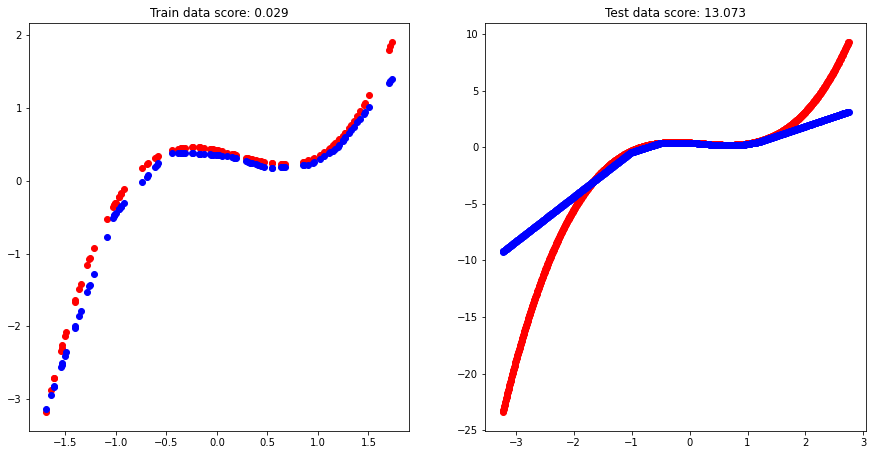

In [352]:
best=df_cube[df_cube["dataset"]=="cube100"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_cb100)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_cb100, train_output_layer_cb100, color='r')
ax.scatter(train_input_layer_cb100,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_cb100,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_cb100)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_cb100, test_output_layer_cb100, color='r')
ax1.scatter(test_input_layer_cb100,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_cb100,output_layer)/output_layer.shape[0],3)))

In [353]:
df_cube.loc[best-1,].drop(["L1", "L2"])

model_n                       161
problem                regression
dataset                   cube100
columns_input                   1
columns_output                  1
rows_train                    100
rows_test                    1201
layers                          1
neurons                        10
connections                    20
regularization               None
alpha                           0
activation_function          ReLU
validate                        0
accuracy_train                  0
accuracy_test                   0
score_train              0.128413
score_test                1.87638
cost_function                 MAE
epochs                        400
time                   0.00337447
rate                          0.1
beta                            0
RMSprop                     False
batch                           1
seed                            4
Name: 160, dtype: object

In [355]:
df_cube[df_cube["dataset"]=="cube100"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.326460,3.164987
MSE,0.277293,31.036502


In [356]:
df_cube[df_cube["dataset"]=="cube100"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.029033,0.445781
MSE,0.109593,96.581811


In [357]:
df_cube[df_cube["dataset"]=="cube100"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').mean()

,score_train,score_test
activation_function,,
ReLU,0.207307,13.460563
sigmoid,0.557134,22.324847
tanh,0.141189,15.516825


In [358]:
df_cube[df_cube["dataset"]=="cube100"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').var()

,score_train,score_test
activation_function,,
ReLU,0.053941,169.223646
sigmoid,0.049009,359.342987
tanh,0.006641,161.481637


In [389]:
df_cube[df_cube["dataset"]=="cube100"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

score_train  score_test
layers neurons activation_function cost_function                         
1      5       ReLU                MAE               0.166071    2.273381
                                   MSE               0.071537   20.798112
               sigmoid             MAE               0.445410    3.644450
                                   MSE               0.324830   35.149372
               tanh                MAE               0.194574    2.891060
                                   MSE               0.141941   30.680689
       10      ReLU                MAE               0.129749    2.054291
                                   MSE               0.038553   18.146629
               sigmoid             MAE               0.442227    3.615330
                                   MSE               0.333655   34.551614
               tanh                MAE               0.184208    2.680258
                                   MSE               0.057784   26.136910
2      10      ReLU                MAE               0.207004    2.605583
                                   MSE               0.057595   22.133054
               sigmoid             MAE               0.452326    3.704063
                                   MSE               0.335911   36.846048
               tanh                MAE               0.224179    2.910631
                                   MSE               0.045903   27.364744
3      10      ReLU                MAE               0.344514    3.217995
                                   MSE               0.268340   30.854801
               sigmoid             MAE               0.601857    4.114561
                                   MSE               0.944451   47.171353
               tanh                MAE               0.203008    3.040480
                                   MSE               0.066572   28.617934
       18      ReLU                MAE               0.201122    2.430148
                                   MSE               0.046162   17.816892
               sigmoid             MAE               0.564554    4.026890
                                   MSE               0.632552   43.223922
               tanh                MAE               0.231754    2.969058
                                   MSE               0.037760   26.298379
4      12      ReLU                MAE               0.446607    3.539248
                                   MSE               0.510430   35.656621
               sigmoid             MAE               0.609006    4.130417
                                   MSE               0.998829   47.720140
               tanh                MAE               0.228110    3.121930
                                   MSE               0.078475   29.489829

In [390]:
df_cube[df_cube["dataset"]=="cube100"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

score_train  score_test
layers neurons activation_function cost_function                          
1      5       ReLU                MAE            7.659776e-03    0.207223
                                   MSE            1.076700e-03   28.484068
               sigmoid             MAE            1.220504e-05    0.000456
                                   MSE            1.705498e-04    0.108831
               tanh                MAE            5.008657e-04    0.020518
                                   MSE            2.269511e-03    2.063490
       10      ReLU                MAE            9.478712e-04    0.015476
                                   MSE            1.173618e-04    1.347417
               sigmoid             MAE            1.791337e-04    0.001476
                                   MSE            8.786758e-05    0.034717
               tanh                MAE            3.026489e-03    0.000910
                                   MSE            8.460900e-05    0.727806
2      10      ReLU                MAE            5.103723e-03    0.265594
                                   MSE            1.697927e-03   60.660933
               sigmoid             MAE            2.149466e-04    0.002372
                                   MSE            1.708001e-03    1.625863
               tanh                MAE            2.445124e-03    0.006912
                                   MSE            3.186194e-04    0.583845
3      10      ReLU                MAE            2.481578e-02    0.355738
                                   MSE            1.496964e-01  125.850894
               sigmoid             MAE            6.034741e-05    0.000282
                                   MSE            4.100289e-03    0.430456
               tanh                MAE            1.574813e-03    0.004116
                                   MSE            2.465287e-04    0.272783
       18      ReLU                MAE            1.455128e-03    0.036344
                                   MSE            5.536980e-04    9.259874
               sigmoid             MAE            1.715983e-03    0.010612
                                   MSE            3.412882e-02    7.905323
               tanh                MAE            9.027615e-04    0.002790
                                   MSE            5.026559e-04    2.173881
4      12      ReLU                MAE            2.934928e-02    0.429526
                                   MSE            1.854690e-01  162.474609
               sigmoid             MAE            3.507256e-07    0.000002
                                   MSE            5.572687e-06    0.000704
               tanh                MAE            9.262694e-04    0.000442
                                   MSE            1.170270e-04    0.321337

In [ ]:
# 1 layer 10 neurons + ReLU + MAE

### Cube 500

In [359]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.train.500.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_cb500=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_cb500=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [360]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.test.500.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_cb500=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_cb500=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [361]:
for se in range(10):
    for L in [[5],[5,5],[10],[3,4,3],[6,6,6],[3,3,3,3]]:
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MSE,"MSE",mlp.MSE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.sigmoid,"sigmoid",mlp.sigmoid_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb500,train_output_layer_cb500,test_input_layer_cb500,test_output_layer_cb500,"cube500",1,1,L,mlp.tanh,"tanh",mlp.tanh_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)

start error 786.9830126742457
end in epoch 400 with error 158.60285435983354
start error 421.05332212240387
end in epoch 400 with error 39.32253513912321
start error 319.759230579868
end in epoch 400 with error 129.2148919239948
start error 457.6681877500242
end in epoch 400 with error 223.62542213772883
start error 308.08209559824815
end in epoch 400 with error 84.6100415941856
start error 277.0455010013724
end in epoch 400 with error 196.96241586505346
start error 602.8134109243198
end in epoch 400 with error 151.7639994589843
start error 478.4567058216045
end in epoch 400 with error 6.637638710296187
start error 376.0826182750442
end in epoch 400 with error 42.86118296552943
start error 485.42970488047314
end in epoch 400 with error 225.04574565540986
start error 347.80118470373213
end in epoch 400 with error 64.1650288514561
start error 302.35578045843806
end in epoch 400 with error 114.37193926192828
start error 444.1232785241641
end in epoch 400 with error 155.2676019973676
start

end in epoch 400 with error 109.58936650603596
start error 821.8140897390216
end in epoch 400 with error 153.5548037947653
start error 535.7529560333485
end in epoch 400 with error 29.611366878324276
start error 557.6248096563431
end in epoch 400 with error 66.07419170604877
start error 587.7410091766669
end in epoch 400 with error 221.05109811257586
start error 408.8350188001864
end in epoch 400 with error 48.56122484448832
start error 385.1500866971159
end in epoch 400 with error 91.67756018440093
start error 900.7389787221998
end in epoch 400 with error 191.02882759372085
start error 534.9890471496145
end in epoch 400 with error 31.92259416283455
start error 944.6763699139747
end in epoch 400 with error 25.340958393797994
start error 489.5640602411296
end in epoch 400 with error 241.79357754706092
start error 365.6702312310216
end in epoch 400 with error 165.47459846691166
start error 524.6797865068024
end in epoch 400 with error 102.82521928685364
start error 871.5340570067716
end 

end in epoch 400 with error 132.95239208268308
start error 477.87175457502934
end in epoch 400 with error 152.65801811148464
start error 442.7043144180362
end in epoch 400 with error 19.456004472001148
start error 447.5773884584089
end in epoch 400 with error 85.03060706603912
start error 350.38710801717355
end in epoch 400 with error 222.2249095257951
start error 339.7995540027944
end in epoch 400 with error 53.85707320899286
start error 335.2734572845584
end in epoch 400 with error 81.30221926120936
start error 777.5376612418273
end in epoch 400 with error 165.79755801112248
start error 643.5960720025614
end in epoch 400 with error 8.79571917141255
start error 704.7089082241323
end in epoch 400 with error 24.918246166762987
start error 433.72928550517815
end in epoch 400 with error 232.63015836882926
start error 417.8593965728114
end in epoch 400 with error 70.936531418404
start error 441.592422388893
end in epoch 400 with error 131.12977458791684
start error 2277.276694326033
end in

end in epoch 13 with error 311.10810754726384
start error 267.97368080088074
end in epoch 400 with error 118.38638707235587
start error 992.614350955216
end in epoch 400 with error 147.20341366428212
start error 301.9889589238138
end in epoch 400 with error 59.81336498361829
start error 231.46101669100838
end in epoch 400 with error 104.87199407608378
start error 661.8841949803048
end in epoch 400 with error 220.10528182000883
start error 327.5040533365747
end in epoch 400 with error 116.24623694300318
start error 294.55267257943615
end in epoch 400 with error 195.01815835449793
start error 498.3399703705097
end in epoch 400 with error 161.48664136385491
start error 340.33040501469577
end in epoch 400 with error 6.004665856675743
start error 245.74513961107806
end in epoch 400 with error 32.50226734980953
start error 296.98081409692503
end in epoch 400 with error 230.062676536028
start error 320.2918565893501
end in epoch 400 with error 64.34495821224678
start error 294.4871766568566
e

In [363]:
df_cube.loc[best-1,].drop(["L1", "L2"])

model_n                       437
problem                regression
dataset                   cube500
columns_input                   1
columns_output                  1
rows_train                    500
rows_test                    1201
layers                          1
neurons                         5
connections                    10
regularization               None
alpha                           0
activation_function          ReLU
validate                        0
accuracy_train                  0
accuracy_test                   0
score_train              0.115787
score_test                1.59422
cost_function                 MAE
epochs                        400
time                    0.0212805
rate                          0.1
beta                            0
RMSprop                     False
batch                           1
seed                            2
Name: 436, dtype: object

[Text(0.5, 1.0, 'Test data score: 9.778')]

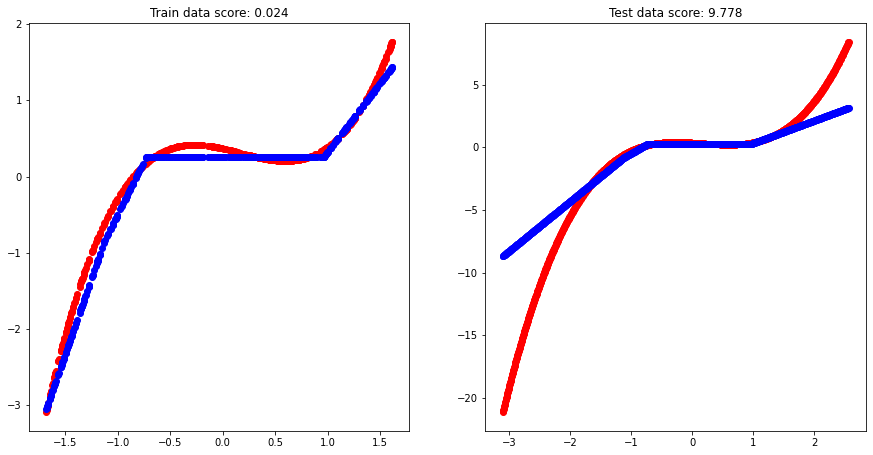

In [362]:
best=df_cube[df_cube["dataset"]=="cube500"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_cb500)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_cb500, train_output_layer_cb500, color='r')
ax.scatter(train_input_layer_cb500,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_cb500,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_cb500)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_cb500, test_output_layer_cb500, color='r')
ax1.scatter(test_input_layer_cb500,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_cb500,output_layer)/output_layer.shape[0],3)))

In [364]:
df_cube[df_cube["dataset"]=="cube500"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.336447,2.789602
MSE,0.273620,24.626284


In [366]:
df_cube[df_cube["dataset"]=="cube500"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.029703,0.393196
MSE,0.107047,67.001199


In [367]:
df_cube[df_cube["dataset"]=="cube500"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').mean()

,score_train,score_test
activation_function,,
ReLU,0.210198,10.760073
sigmoid,0.550771,18.079333
tanh,0.154130,12.284424


In [368]:
df_cube[df_cube["dataset"]=="cube500"][['activation_function', 'score_train', 'score_test']].groupby('activation_function').var()

,score_train,score_test
activation_function,,
ReLU,0.056171,107.118101
sigmoid,0.051032,228.882119
tanh,0.008555,95.934317


In [391]:
df_cube[df_cube["dataset"]=="cube500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).mean()

score_train  score_test
layers neurons activation_function cost_function                         
1      5       ReLU                MAE               0.153612    1.882234
                                   MSE               0.072720   16.486227
               sigmoid             MAE               0.443876    3.134723
                                   MSE               0.303869   27.891102
               tanh                MAE               0.250263    2.667771
                                   MSE               0.172746   24.586607
       10      ReLU                MAE               0.126596    1.704972
                                   MSE               0.034613   14.317542
               sigmoid             MAE               0.438204    3.071298
                                   MSE               0.305866   27.332433
               tanh                MAE               0.195442    2.357458
                                   MSE               0.062686   20.718984
2      10      ReLU                MAE               0.248672    2.385714
                                   MSE               0.055638   17.305289
               sigmoid             MAE               0.462573    3.266219
                                   MSE               0.320474   29.335390
               tanh                MAE               0.211867    2.524950
                                   MSE               0.048999   21.202668
3      10      ReLU                MAE               0.372688    2.876945
                                   MSE               0.269851   24.755209
               sigmoid             MAE               0.613242    3.710013
                                   MSE               0.937160   38.370723
               tanh                MAE               0.242662    2.685387
                                   MSE               0.070193   22.000856
       18      ReLU                MAE               0.193156    2.102349
                                   MSE               0.037647   13.280870
               sigmoid             MAE               0.569036    3.611759
                                   MSE               0.594095   34.597748
               tanh                MAE               0.219255    2.588766
                                   MSE               0.026411   20.426576
4      12      ReLU                MAE               0.442902    3.135471
                                   MSE               0.514287   28.888052
               sigmoid             MAE               0.622125    3.727996
                                   MSE               0.998736   38.902588
               tanh                MAE               0.249877    2.778818
                                   MSE               0.099161   22.874251

In [392]:
df_cube[df_cube["dataset"]=="cube500"][['layers', 'neurons','activation_function','cost_function', 'accuracy_train','accuracy_test','score_train', 'score_test']].groupby(['layers', 'neurons','activation_function','cost_function']).var()

score_train  score_test
layers neurons activation_function cost_function                          
1      5       ReLU                MAE            5.868002e-03    0.192023
                                   MSE            1.989311e-03   18.483638
               sigmoid             MAE            1.211621e-05    0.000592
                                   MSE            7.014950e-05    0.070146
               tanh                MAE            7.889360e-03    0.049395
                                   MSE            3.281273e-03    1.581160
       10      ReLU                MAE            1.155414e-03    0.005536
                                   MSE            1.607964e-04    0.797427
               sigmoid             MAE            5.013820e-05    0.000193
                                   MSE            2.804773e-05    0.019699
               tanh                MAE            1.242838e-03    0.001156
                                   MSE            2.349681e-04    0.558126
2      10      ReLU                MAE            2.233046e-02    0.332474
                                   MSE            2.342114e-03   38.930807
               sigmoid             MAE            2.545188e-04    0.005469
                                   MSE            1.053995e-03    0.987326
               tanh                MAE            1.401365e-03    0.005888
                                   MSE            6.356324e-04    0.464245
3      10      ReLU                MAE            2.010776e-02    0.260579
                                   MSE            1.489416e-01   84.184984
               sigmoid             MAE            6.936616e-05    0.000277
                                   MSE            5.429732e-03    0.421844
               tanh                MAE            1.785181e-03    0.007778
                                   MSE            5.973202e-04    0.195997
       18      ReLU                MAE            1.773494e-03    0.041059
                                   MSE            1.304132e-03    5.778055
               sigmoid             MAE            1.349277e-03    0.008452
                                   MSE            3.640676e-02    6.420458
               tanh                MAE            2.455585e-03    0.001898
                                   MSE            2.439542e-04    1.088613
4      12      ReLU                MAE            3.144816e-02    0.334258
                                   MSE            1.809084e-01  105.552565
               sigmoid             MAE            3.112444e-07    0.000001
                                   MSE            6.125079e-06    0.000570
               tanh                MAE            1.195279e-03    0.001333
                                   MSE            1.407067e-03    0.459729

### Cube 1000

In [408]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.train.1000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_cb1000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_cb1000=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [409]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.test.1000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_cb1000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_cb1000=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [410]:
# puscic

In [426]:
for se in range(10):
    for L in [[10]]:
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb1000,train_output_layer_cb1000,test_input_layer_cb1000,test_output_layer_cb1000,"cube1000",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)
    

start error 602.5487953159093
end in epoch 400 with error 130.48555929894246
start error 555.1087153778037
end in epoch 400 with error 134.74651087875623
start error 872.4226988308671
end in epoch 400 with error 83.32769711405857
start error 490.90228947616424
end in epoch 400 with error 117.33302824053304
start error 484.2070483863115
end in epoch 400 with error 101.3095625428588
start error 820.9985904083997
end in epoch 400 with error 132.94703689068544
start error 806.9469324200336
end in epoch 400 with error 105.79516421070116
start error 1043.9357077971822
end in epoch 400 with error 116.54668224988097
start error 567.7515871635252
end in epoch 400 with error 94.98249440165333
start error 619.4335113999648
end in epoch 400 with error 146.16391435666992


[Text(0.5, 1.0, 'Test data score: 13.684')]

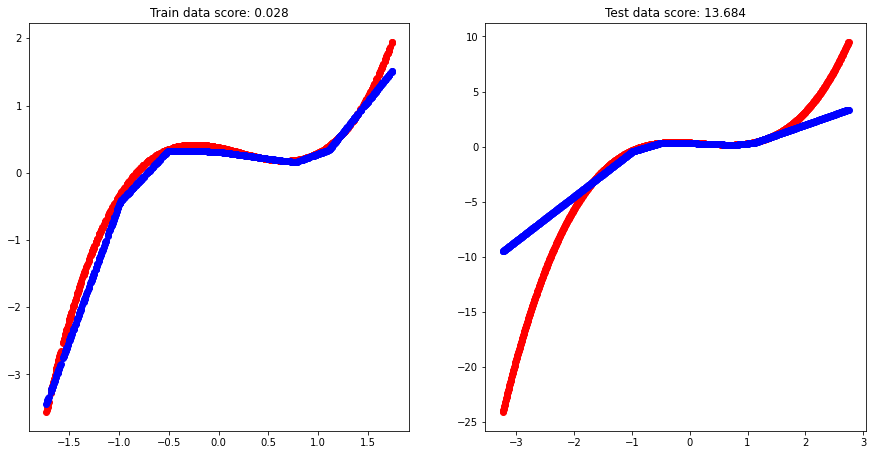

In [414]:
best=df_cube[df_cube["dataset"]=="cube1000"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_cb1000)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_cb1000, train_output_layer_cb1000, color='r')
ax.scatter(train_input_layer_cb1000,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_cb1000,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_cb1000)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_cb1000, test_output_layer_cb1000, color='r')
ax1.scatter(test_input_layer_cb1000,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_cb1000,output_layer)/output_layer.shape[0],3)))

In [417]:
df_cube[df_cube["dataset"]=="cube1000"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.116364,2.015115


In [418]:
df_cube[df_cube["dataset"]=="cube1000"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.000399,0.018334


In [ ]:
df_cube[df_cube["dataset"]=="cube1000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

In [ ]:
df_cube[df_cube["dataset"]=="cube1000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

### Cube 10000

In [419]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.train.10000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
np.random.shuffle(test)
X=test[:,0:1]
Y=test[:,1:2]
train_input_layer_cb10000=(X-np.mean(X,axis=0))/np.std(X,axis=0)
train_output_layer_cb10000=(Y-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [420]:
test = np.loadtxt("Project 1 datasets/regression/data.cube.test.10000.csv", delimiter=',', skiprows=1, usecols=range(0,2))
X1=test[:,0:1]
Y1=test[:,1:2]
test_input_layer_cb10000=(X1-np.mean(X,axis=0))/np.std(X,axis=0)
test_output_layer_cb10000=(Y1-np.mean(Y,axis=0))/np.std(Y,axis=0)

In [421]:
# puscic

In [427]:
for se in range(10):
    for L in [[10]]:
        df_cube=Generate_network_scores(df_cube,train_input_layer_cb10000,train_output_layer_cb10000,test_input_layer_cb10000,test_output_layer_cb10000,"cube10000",1,1,L,mlp.ReLU,"ReLU",mlp.ReLU_grad,mlp.MAE,"MAE",mlp.MAE_grad,networks,networks_err,problem="regression",seed=se)

start error 6046.67256547167
end in epoch 400 with error 1111.7812807990574
start error 5587.327915827478
end in epoch 400 with error 774.4602166530944
start error 8717.95246509502
end in epoch 400 with error 1282.3033775102374
start error 4912.805279793238
end in epoch 400 with error 1242.0054426390245
start error 4826.109557479306
end in epoch 400 with error 1212.4844451317126
start error 8250.840648313502
end in epoch 400 with error 1011.5889362761525
start error 8015.8812522302915
end in epoch 400 with error 1438.8662419241282
start error 10439.812073721232
end in epoch 400 with error 1089.4774790172623
start error 5662.180876038121
end in epoch 400 with error 1297.4220457890206
start error 6219.704036421138
end in epoch 400 with error 2021.8399715534904


[Text(0.5, 1.0, 'Test data score: 11.928')]

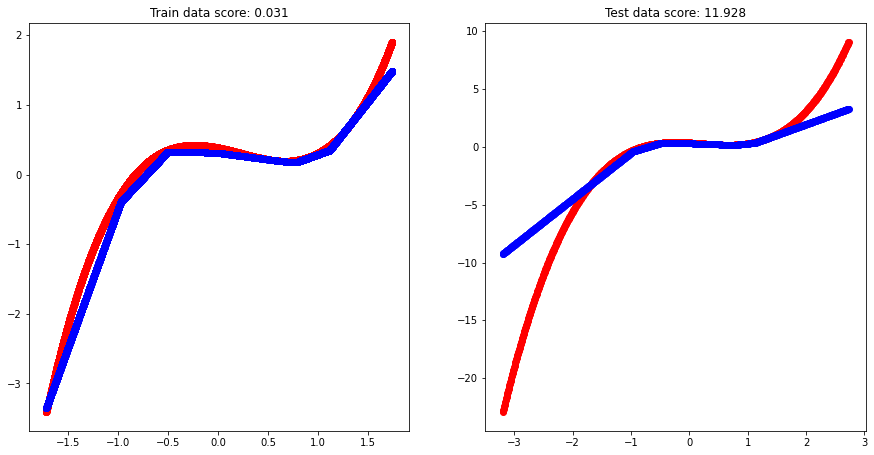

In [428]:
best=df_cube[df_cube["dataset"]=="cube10000"].nsmallest(1, 'score_test')["model_n"].values[0]
mlp_test=networks[best-1]

output_layer=mlp_test.calculate(train_input_layer_cb10000)
fig=plt.figure(figsize=(15,7.5))
ax=fig.add_subplot(121)
ax.scatter(train_input_layer_cb10000, train_output_layer_cb10000, color='r')
ax.scatter(train_input_layer_cb10000,output_layer,color="b")
ax.set(title='Train data score: ' +str(round(mlp.MSE(train_output_layer_cb10000,output_layer)/output_layer.shape[0],3)))

output_layer=mlp_test.calculate(test_input_layer_cb10000)

ax1=fig.add_subplot(122)
ax1.scatter(test_input_layer_cb10000, test_output_layer_cb10000, color='r')
ax1.scatter(test_input_layer_cb10000,output_layer,color="b")
ax1.set(title='Test data score: ' +str(round(mlp.MSE(test_output_layer_cb10000,output_layer)/output_layer.shape[0],3)))

In [430]:
df_cube[df_cube["dataset"]=="cube10000"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').mean()

,score_train,score_test
cost_function,,
MAE,0.119737,1.851687


In [431]:
df_cube[df_cube["dataset"]=="cube10000"][['cost_function', 'score_train', 'score_test']].groupby('cost_function').var()

,score_train,score_test
cost_function,,
MAE,0.001069,0.006191


In [ ]:
df_cube[df_cube["dataset"]=="cube10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').mean()

In [ ]:
df_cube[df_cube["dataset"]=="cube10000"][['activation_function', 'accuracy_train', 'accuracy_test']].groupby('activation_function').var()

# Visualisations

In [436]:
frames = [df, df_gauss[df_gauss['dataset']=='three_gauss100'], df_act[df_act['dataset']=='activation100'], df_cube[df_cube['dataset']=='cube100']]

In [437]:
frames = pd.concat(frames)

In [438]:
frames.head()

,model_n,problem,dataset,columns_input,columns_output,rows_train,rows_test,layers,neurons,connections,L1,L2,regularization,alpha,activation_function,validate,accuracy_train,accuracy_test,score_train,score_test,cost_function,epochs,time,rate,beta,RMSprop,batch,seed
0,1,classification,simple100,2,2,100,100,1,5,20,0.532653,0.642904,None,0,sigmoid,0,0.95,0.99,0.203490,0.212760,MSE,400,0.005815,0.1,0,False,1,0
1,2,classification,simple100,2,2,100,100,1,5,20,0.466975,0.601020,None,0,ReLU,0,1,1,0.079358,0.083241,MSE,400,0.005409,0.1,0,False,1,0
2,3,classification,simple100,2,2,100,100,1,5,20,0.502857,0.621156,None,0,tanh,0,1,1,0.067878,0.071045,MSE,400,0.006119,0.1,0,False,1,0
3,4,classification,simple100,2,2,100,100,1,5,20,1.495079,1.127679,None,0,sigmoid,0,0.99,1,0.131940,0.138341,cross entropy,400,0.006677,0.1,0,False,1,0
4,5,classification,simple100,2,2,100,100,1,5,20,1.020574,0.894674,None,0,ReLU,0,1,0.99,0.045921,0.053307,cross entropy,400,0.009587,0.1,0,False,1,0


In [439]:
df_c=frames[frames["problem"]=="classification"]

In [440]:
df_r=frames[frames["problem"]!="classification"]

## Score vs connections

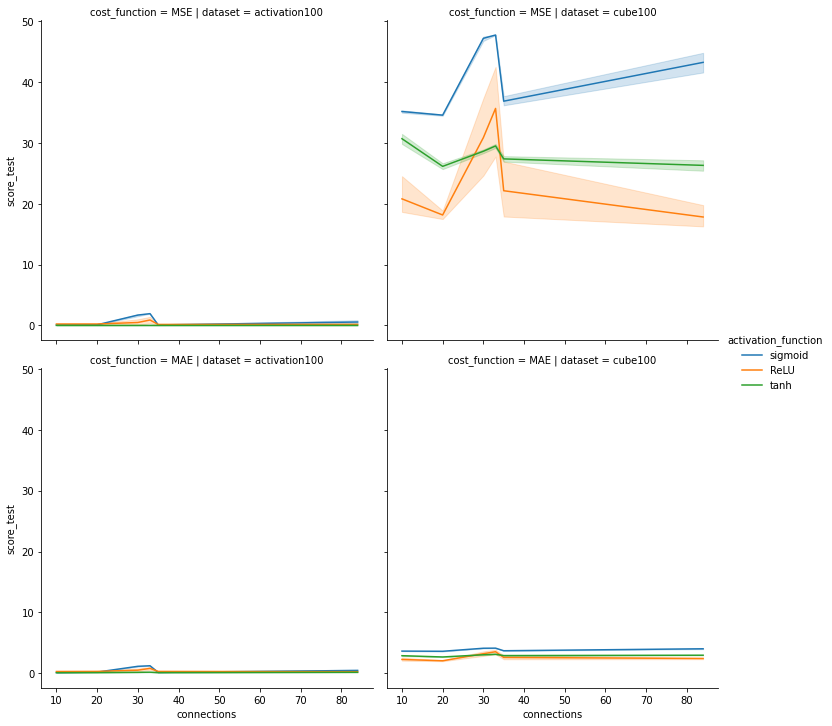

In [441]:
sns.relplot(x="connections",y="score_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_r)

DataError: No numeric types to aggregate

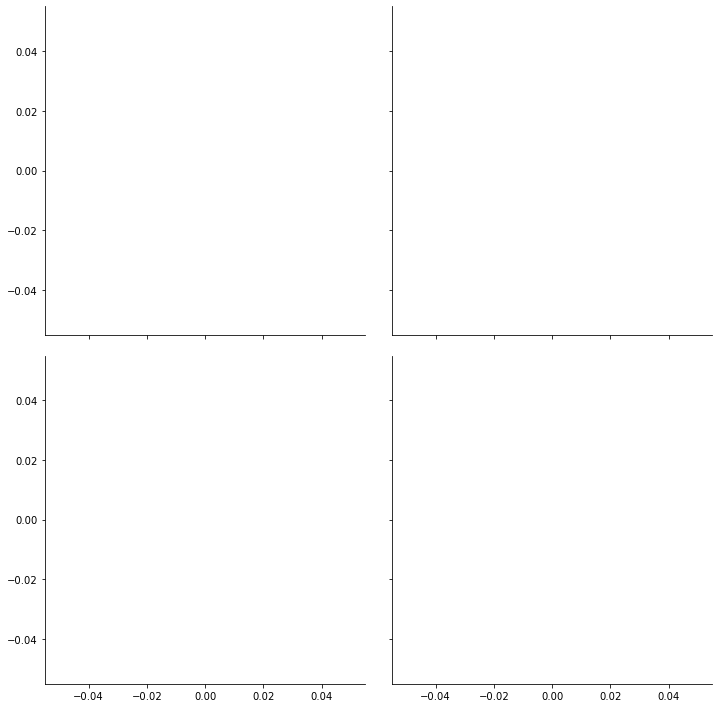

In [495]:
sns.relplot(x="connections",y="accuracy_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_c)

## Score vs layers

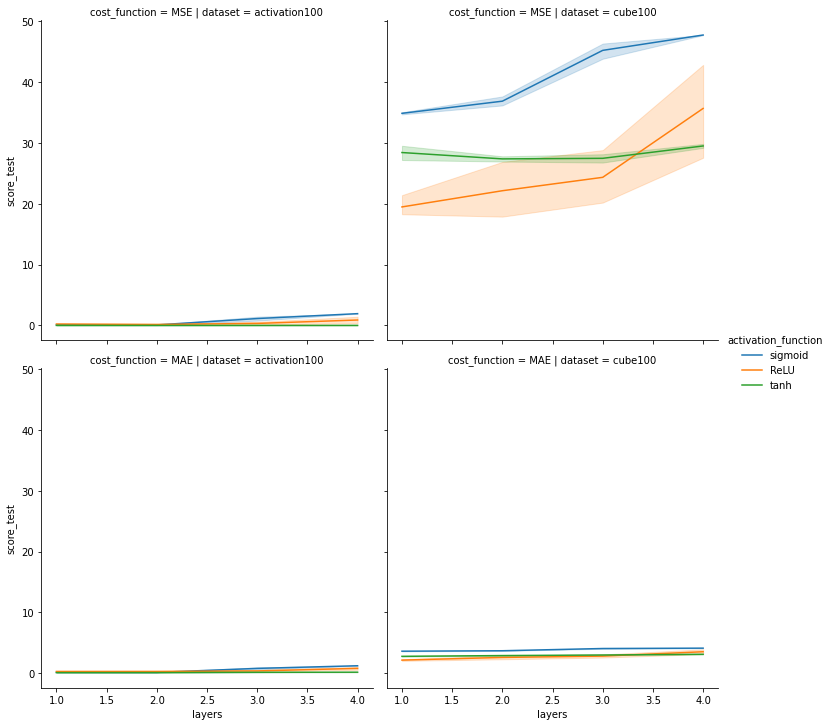

In [444]:
sns.relplot(x="layers",y="score_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_r)

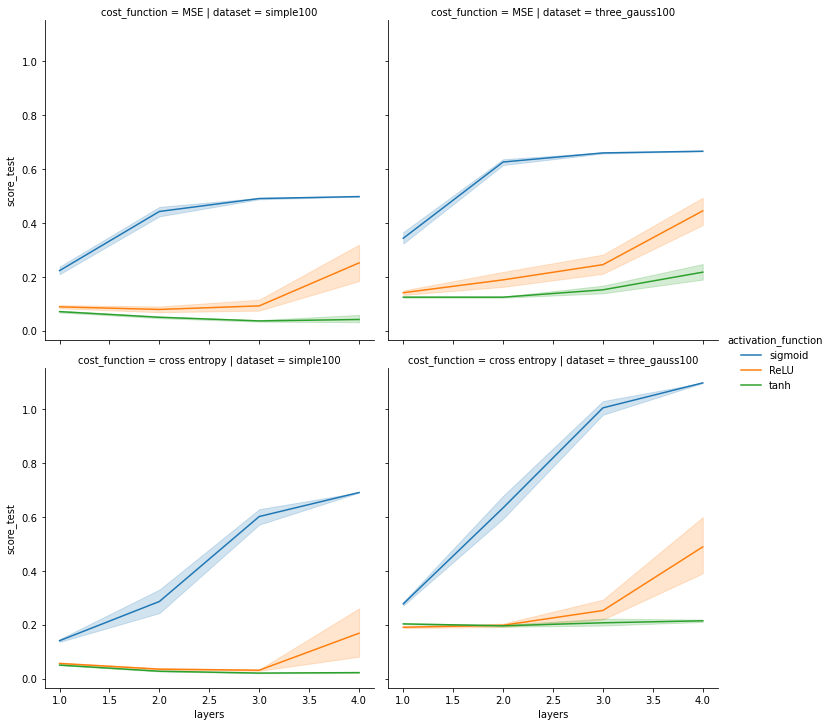

In [445]:
sns.relplot(x="layers",y="score_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_c)

In [ ]:
sns.relplot(x="layers",y="score_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_c)

## Neurons

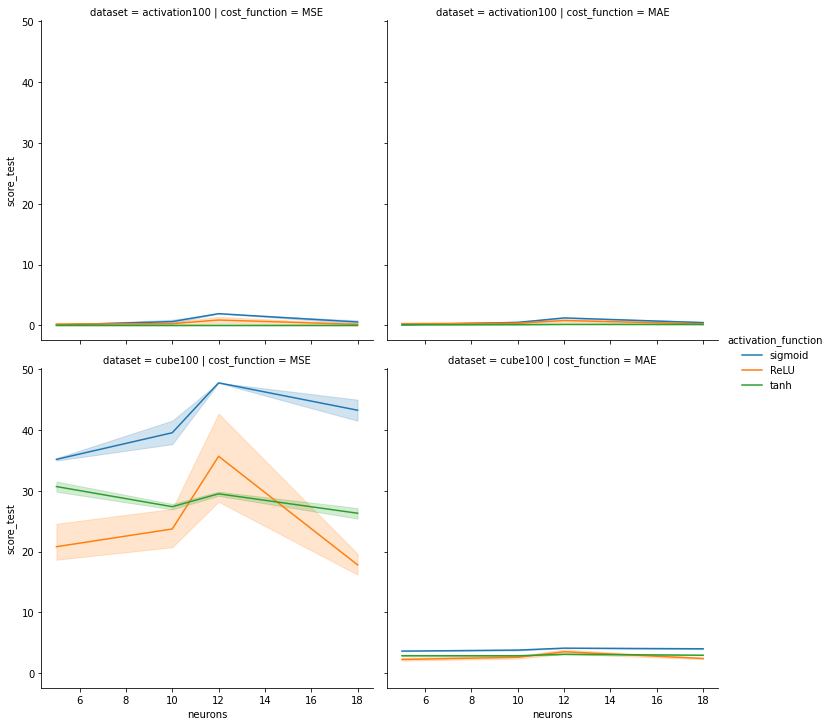

In [448]:
sns.relplot(x="neurons",y="score_test",row="dataset",col="cost_function",hue="activation_function",kind="line",data=df_r)

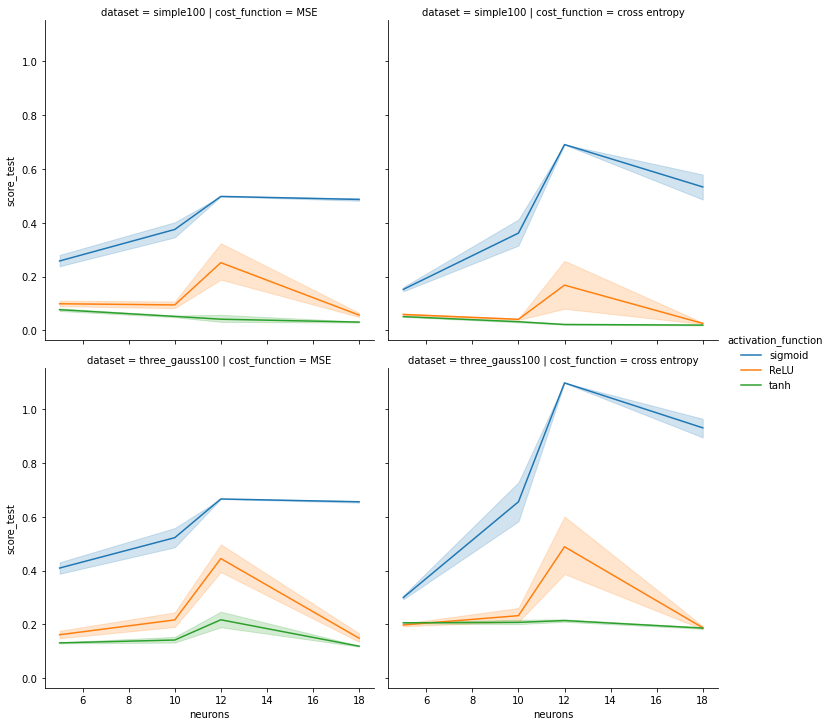

In [498]:
sns.relplot(x="neurons",y="score_test",row="dataset",col="cost_function",hue="activation_function",kind="line",data=df_c)

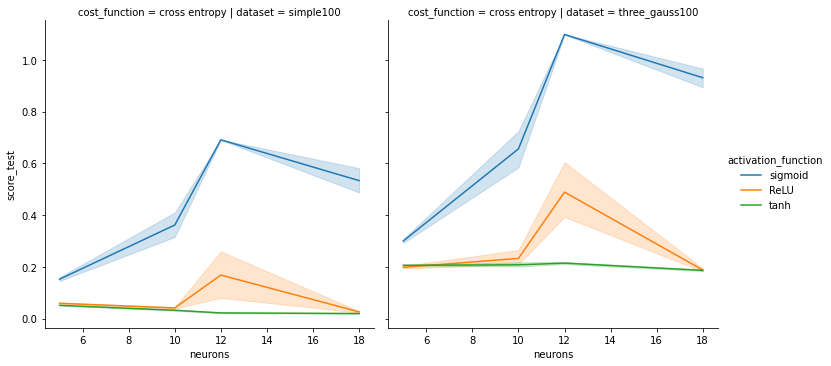

In [450]:
sns.relplot(x="neurons",y="score_test",col="dataset",row="cost_function",hue="activation_function",kind="line",data=df_c[df_c.cost_function=="cross entropy"])

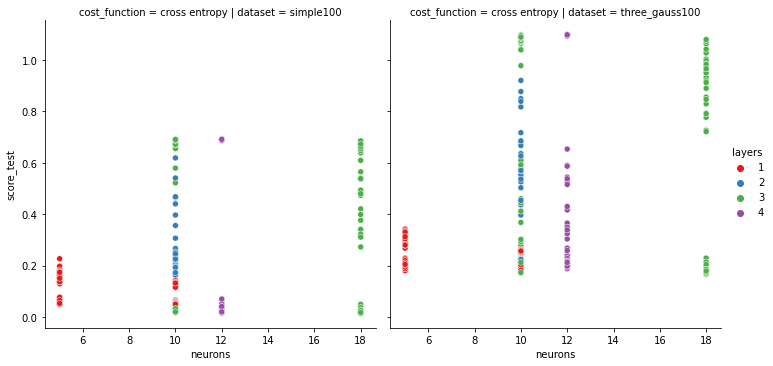

In [451]:
sns.relplot(x="neurons",y="score_test",col="dataset",row="cost_function",kind="scatter",hue="layers",data=df_c[df_c.cost_function=="cross entropy"],palette=sns.color_palette("Set1", df_r.layers.nunique()))

## Time vs architecture

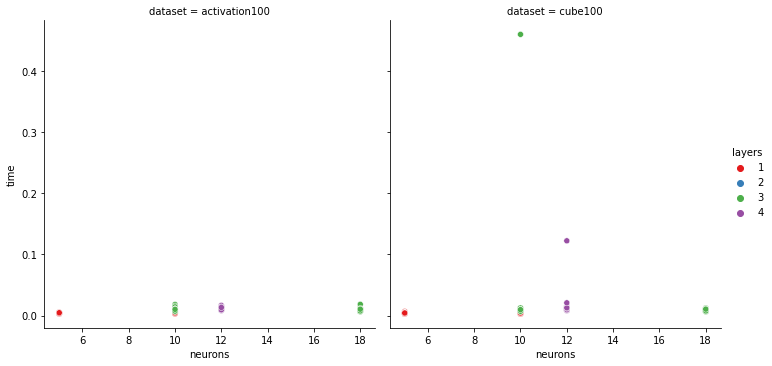

In [453]:
sns.relplot(x="neurons",y="time",col="dataset",hue="layers",kind="scatter",data=df_r,palette=sns.color_palette("Set1", df_r.layers.nunique()))

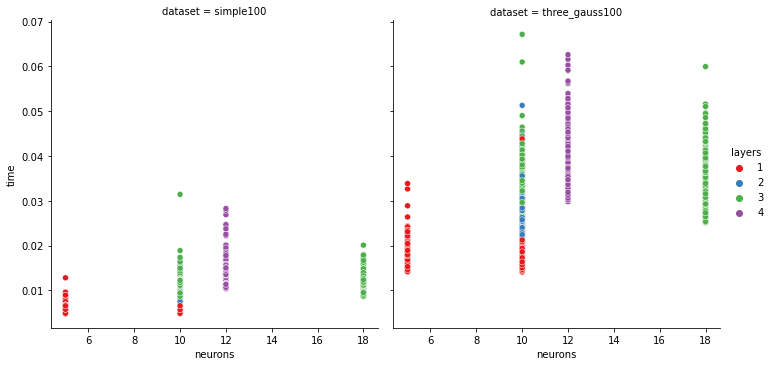

In [454]:
sns.relplot(x="neurons",y="time",col="dataset",hue="layers",kind="scatter",data=df_c,palette=sns.color_palette("Set1", df_c.layers.nunique()))

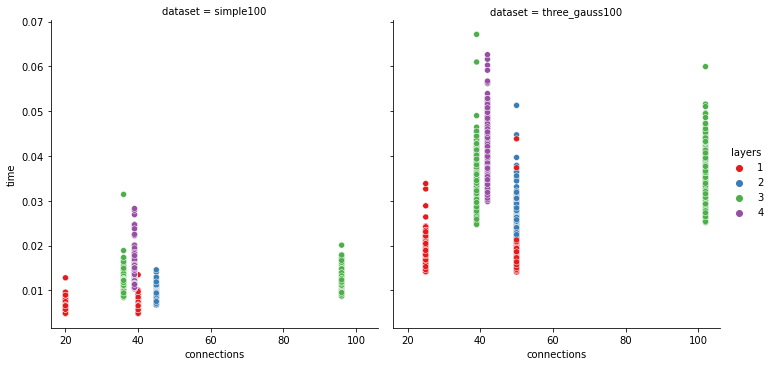

In [456]:
sns.relplot(x="connections",y="time",col="dataset",kind="scatter",hue="layers",data=df_c,palette=sns.color_palette("Set1", df_c.layers.nunique()))

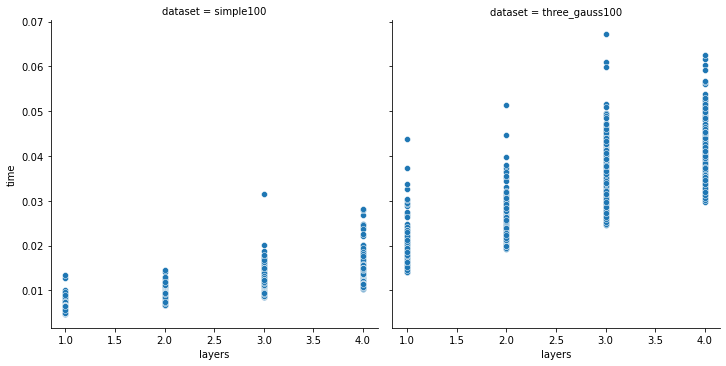

In [457]:
sns.relplot(x="layers",y="time",col="dataset",kind="scatter",data=df_c)

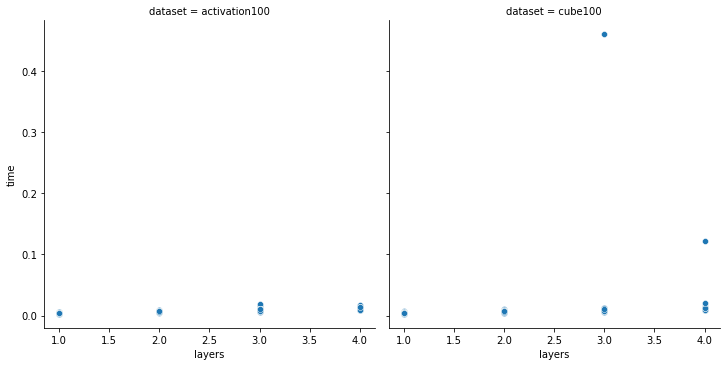

In [458]:
sns.relplot(x="layers",y="time",col="dataset",kind="scatter",data=df_r)

# Activation function

In [466]:
boxsimple=df_c[df_c['dataset']=='simple100'][['activation_function', 'accuracy_test']]

Text(0.5, 1.0, 'Dataset: simple100')

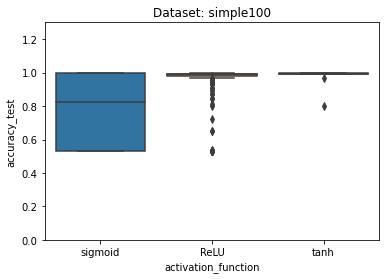

In [480]:
import matplotlib.pyplot as plt
plt.ylim(0, 1.3)
sns.boxplot(x="activation_function", y="accuracy_test", data=boxsimple).set_title('Dataset: simple100')


Text(0.5, 1.0, 'Dataset: three_gauss100')

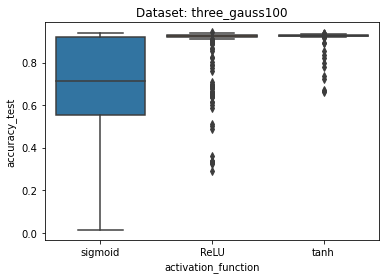

In [479]:
sns.boxplot(x="activation_function", y="accuracy_test", data=df_c[df_c['dataset']=='three_gauss100']).set_title('Dataset: three_gauss100')

Text(0.5, 1.0, 'Dataset: activation100')

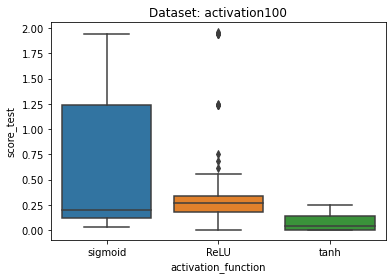

In [476]:
sns.boxplot(x="activation_function", y="score_test", data=df_r[df_r['dataset']=='activation100']).set_title('Dataset: activation100')

Text(0.5, 1.0, 'Dataset: cube100')

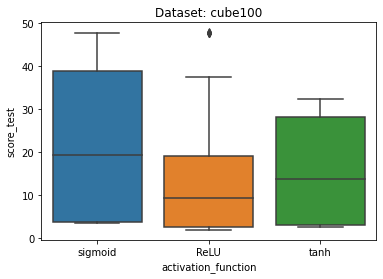

In [478]:
sns.boxplot(x="activation_function", y="score_test", data=df_r[df_r['dataset']=='cube100']).set_title('Dataset: cube100')

## Cost function

Text(0.5, 1.0, 'Dataset: simple100')

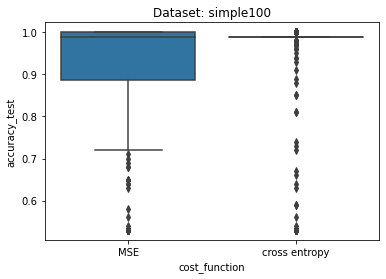

In [482]:
sns.boxplot(x="cost_function", y="accuracy_test", data=df_c[df_c['dataset']=='simple100']).set_title('Dataset: simple100')

Text(0.5, 1.0, 'Dataset: three_gauss100')

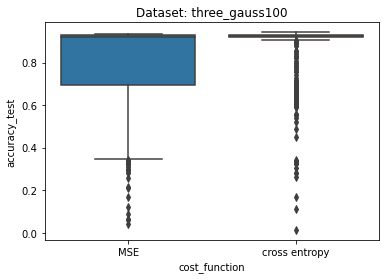

In [483]:
sns.boxplot(x="cost_function", y="accuracy_test", data=df_c[df_c['dataset']=='three_gauss100']).set_title('Dataset: three_gauss100')

Text(0.5, 1.0, 'Dataset: activation100')

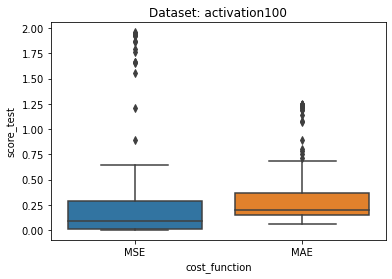

In [484]:
sns.boxplot(x="cost_function", y="score_test", data=df_r[df_r['dataset']=='activation100']).set_title('Dataset: activation100')

Text(0.5, 1.0, 'Dataset: cube100')

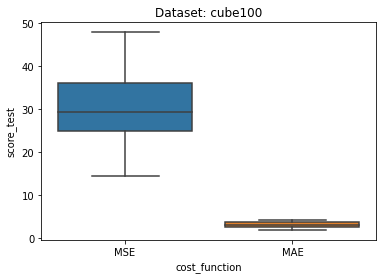

In [485]:
sns.boxplot(x="cost_function", y="score_test", data=df_r[df_r['dataset']=='cube100']).set_title('Dataset: cube100')

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')